# Original Dataset

# Data Science: Final Project
## NYC Capital Project Modeling
### Jacob Goodman and Alan Leidner
#### Dec 19, 2021
- Assignment: https://yu.instructure.com/courses/50398/assignments/191934
- Proposal Document: https://github.com/yuleidner/DAV-6150/blob/main/Final%20Project/FinalProjectProposal.ipynb

# Abstract

New York City has a capital project plan which frequently goes over budget. We will examine the publicly available dataset, extract features surrounding the current state of the project, and then train multiple models to predict the final budget. We will compare the effectiveness of these models, and hope to create one that will allow for accurate forecasting.

# Introduction 
"The Mayor’s Office of Management and Budget (OMB) is the City government's chief financial agency. OMB's staff of more than 400 analysts assemble and oversee both the expense budget (Fiscal Year 2022 98.7 billion dollars) and capital budget (Fiscal Year 2022 Adopted Capital Budget 17.0 billion dollars). The City of New York funds the activities of approximately 70 city agencies with more than 300,000 full-time and full-time equivalent employees.

In addition, OMB plays many other important roles. Among these, the agency is charged with evaluating the efficiency and cost-effectiveness of City services and proposals. OMB's economists provide vital information to government officials on the local, United States and world economies. OMB also helps implement the City's borrowing and bond programs and conducts legal reviews of capital projects for financing with bond proceeds."[1]

Historically in New York City projects have been underestimated. Sometimes this work is accidentally underestimated. Sometimes unforeseen circumstances arise that delay a project or cause its cost to rise. At other times however, project planners intentionally underestimate the cost to get a project started; Once the project is started, politicians are pressured to commit more resources or be accused of wasting the original budget.

The legislature in NYC should be able to use the history of capital projects to accurately assess the length and costs of projects. This will help them weigh the true cost/benefit to their constituents.

Citizens have a right to know whether or not their tax dollars are being committed to a project that is underestimated, which will lead to even more money becoming dedicated to the project.

[1] https://www1.nyc.gov/site/omb/about/about-omb.page

Research Questions
- How much will a project be over budget?
- How long will a project run over the original deadline?
- Can we identify the factors that provide the greatest contribution to the delays and cost overruns?

We will ingest publicly available data, transform it to be useful to our modeling work, and then construct a set of predictive regression models including;
- A baseline model
- A linear regression model
- A random forest model
- An XGboost model
- An ensemble model

For this project we utilized data on contracts with the city of new with the hope of being able to predict if a project will be over budget:

data sources:
* https://data.cityofnewyork.us/City-Government/Capital-Project-Detail-Data-Dollars/wa2y-rh4b
* https://raw.githubusercontent.com/yuleidner/DAV-6150/main/Final%20Project/chriswhong-nyc_capital_project_detail_data_-_2020-12-04-20-08-48/body.csv


In [1]:

#Import packages for data frames 
import numpy as np
import pandas as pd

#Import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

#This ignores depreciation warnings, which will make the code more readable
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

# modeling inmports
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis

## Import Data

The dataset was loaded into the DAV 6150 Github Repository for our final project here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/Final%20Project/Capital_Project_Detail_Data_-_Dollars.csv. This notebook will now load the csv into a Pandas dataframe for analysis.

In [2]:
# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/Final%20Project/Capital_Project_Detail_Data_-_Dollars.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,PUB_DATE,BORO,MANAGING_AGCY_CD,MANAGING_AGCY,PROJECT_ID,PROJECT_DESCR,TYP_CATEGORY_NAME,COMMUNITY_BOARD,BUDGET_LINE,DELAY_DESC,SITE_DESCR,SCOPE_TEXT,FY_YR1_PLAN,ORIG_BUD_AMT,CITY_PRIOR_ACTUAL,CITY_YR1_PLAN,CITY_YR2_PLAN,CITY_YR3_PLAN,CITY_YR4_PLAN,CITY_YR5_PLAN,CITY_RTC,CITY_PLAN_TOTAL,NONCITY_PRIOR_ACTUAL,NONCITY_YR1_PLAN,NONCITY_YR2_PLAN,NONCITY_YR3_PLAN,NONCITY_YR4_PLAN,NONCITY_YR5_PLAN,NONCITY_RTC,NONCITY_PLAN_TOTAL
0,20200116,CITYWIDE,42,CITY UNIVERSITY,CA207-006,CUNY Incubator Network,MISCELLANEOUS RECONSTRUCTION,0,HN-0206,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,PROVIDE SPACE IN EACH COMMUNITY COLLEGE TO OFF...,2020,7500,0.0,0,0,0,0,7160,0,7160.0,0.0,0,0,0,0,0,0,0.0
1,20200116,CITYWIDE,56,POLICE DEPARTMENT,PO79-ADA,ADA COMPLIANCE RENOVATIONS AT NYPD PRECINCTS,POLICE FACILITIES,0,PO-0079,NaN,NaN,ADA COMPLIANCE RENOVATION AT NYPD PRECINTS,2020,29337,0.0,8000,12000,9337,0,0,0,29337.0,0.0,0,0,0,0,0,0,0.0
2,20200116,CITYWIDE,56,POLICE DEPARTMENT,PO79BATH,CITYWIDE BATHROOM RENOVATION,POLICE FACILITIES,0,PO-0079,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,BATHROOM RENOVATION,2020,346,36575.0,543,0,0,0,0,0,37118.0,0.0,0,0,0,0,0,0,0.0
3,20200116,CITYWIDE,56,POLICE DEPARTMENT,PO79BMAHD,"BATHROOM RENO AT 67TH, 77TH AND TRAFFIC CONTRO...",POLICE FACILITIES,0,PO-0079,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,BATHROOM RENOVATION,2020,1407,1354.0,53,0,0,0,0,0,1407.0,0.0,0,0,0,0,0,0,0.0
4,20200116,CITYWIDE,56,POLICE DEPARTMENT,PO79BMAHG,"ELEVATOR REHABILITATION FOR 20TH, 25TH",POLICE FACILITIES,0,PO-0079,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,VARIOUS CITYWIDE,ELEVATOR REHABILITATION,2020,602,0.0,2500,0,0,0,0,0,2500.0,0.0,0,0,0,0,0,0,0.0


## Data Validation

In [3]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(41783, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41783 entries, 0 to 41782
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PUB_DATE              41783 non-null  int64  
 1   BORO                  41783 non-null  object 
 2   MANAGING_AGCY_CD      41783 non-null  int64  
 3   MANAGING_AGCY         41783 non-null  object 
 4   PROJECT_ID            41783 non-null  object 
 5   PROJECT_DESCR         41783 non-null  object 
 6   TYP_CATEGORY_NAME     41783 non-null  object 
 7   COMMUNITY_BOARD       38346 non-null  object 
 8   BUDGET_LINE           41783 non-null  object 
 9   DELAY_DESC            22656 non-null  object 
 10  SITE_DESCR            13737 non-null  object 
 11  SCOPE_TEXT            41050 non-null  object 
 12  FY_YR1_PLAN           41783 non-null  int64  
 13  ORIG_BUD_AMT          41783 non-null  int64  
 14  CITY_PRIOR_ACTUAL     41783 non-null  float64
 15  CITY_YR1_PLAN      

It looks like there are 20 numeric (categorical and quantitative) features, and 10 text based features. We noticed that there is a project_id field in the feature set. We will now examine one of these values to get a better sense of the data.

In [5]:
df.loc[df['PROJECT_ID'] == 'P-6PVMNT2']

,PUB_DATE,BORO,MANAGING_AGCY_CD,MANAGING_AGCY,PROJECT_ID,PROJECT_DESCR,TYP_CATEGORY_NAME,COMMUNITY_BOARD,BUDGET_LINE,DELAY_DESC,SITE_DESCR,SCOPE_TEXT,FY_YR1_PLAN,ORIG_BUD_AMT,CITY_PRIOR_ACTUAL,CITY_YR1_PLAN,CITY_YR2_PLAN,CITY_YR3_PLAN,CITY_YR4_PLAN,CITY_YR5_PLAN,CITY_RTC,CITY_PLAN_TOTAL,NONCITY_PRIOR_ACTUAL,NONCITY_YR1_PLAN,NONCITY_YR2_PLAN,NONCITY_YR3_PLAN,NONCITY_YR4_PLAN,NONCITY_YR5_PLAN,NONCITY_RTC,NONCITY_PLAN_TOTAL
489,20200116,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2020,1,50.0,2300,0,0,0,0,0,2350.0,0.0,0,0,0,0,0,0,0.0
5724,20200416,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2020,1,50.0,2300,0,0,0,0,0,2350.0,0.0,0,0,0,0,0,0,0.0
10815,20190425,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2019,1,0.0,1,2299,0,0,0,0,2300.0,0.0,0,0,0,0,0,0,0.0
15953,20191025,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2020,1,50.0,2300,0,0,0,0,0,2350.0,0.0,0,0,0,0,0,0,0.0
21291,20201123,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2021,1,2255.0,255,0,0,0,0,0,2510.0,0.0,0,0,0,0,0,0,0.0
26491,20210114,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2021,1,2255.0,255,0,0,0,0,0,2510.0,0.0,0,0,0,0,0,0,0.0
31720,20210805,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2021,1,2255.0,255,0,0,0,0,0,2510.0,0.0,0,0,0,0,0,0,0.0
36979,2021122,CITYWIDE,846,DEPT OF PARKS AND RECREATION,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,P-1018,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,2021,1,2255.0,50,205,0,0,0,0,2510.0,0.0,0,0,0,0,0,0,0.0


This presents problems with our data set. It looks like a single project has been entered 2-3 times a year with updates. We will have to find some way to aggregate these projects while maintaining data integrity. Luckily for us, we found Chris Whong who had the same problem as us. His Github folder can be found here, along with the instructions for aggregating the data. We will not replicate his transformations here (as it is not the purpose of this notebook), though his steps can be followed for those who are interested in applying our notebook to future updates of the nyc data. For now, we will just import and use his prepared data set: 
* https://qri.cloud/chriswhong/nyc_capital_project_detail_data
## Import Corrected Data

In [6]:
del df #delete previous dataframe to free up memory
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/Final%20Project/chriswhong-nyc_capital_project_detail_data_-_2020-12-04-20-08-48/body.csv"
df = pd.read_csv(filename)
df.head()

,project_id,project_description,managing_agency_id,managing_agency,ten_year_plan_category,community_boards_served,borough,budget_lines,original_budget,city_prior_actuals,city2021,city2022,city2023,city2024,city2025,city_r_t_c,city_total,non_city_prior_actuals,non_city2021,non_city2022,non_city2023,non_city2024,non_city2025,non_city_r_t_c,non_city_total,combined_prior_actuals,combined2021,combined2022,combined2023,combined2024,combined2025,combined_r_t_c,combined_total,explanation_for_delay,project_location,scope_summary,source_pdf
0,LB20DUMBO,ADAMS STREET LIBRARY FIT OUT,38,BROOKLYN PUBLIC LIBRARY,ESSENTIAL RECONSTRUCTION OF FACILITIES,301,BROOKLYN,LB-0101 LB-0108 LB-0104,5000,0,5000,0,0,0,0,0,5000,0,0,0,0,0,0,0,0,0,5000,0,0,0,0,0,5000,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,NEW BRANCH FIT OUT,cpd11-20bk.pdf
1,LBC17DRBR,DYKER INTERIOR RENOVATION,38,BROOKLYN PUBLIC LIBRARY,ESSENTIAL RECONSTRUCTION OF FACILITIES,310,BROOKLYN,LB-D104 LB-K001,1000,0,0,0,100,807,750,0,1657,0,0,0,0,0,0,0,0,0,0,0,100,807,750,0,1657,NaN,NaN,DYKER INTERIOR RENOVATION,cpd11-20bk.pdf
2,LBC18CTRF,CORTELYOU ROOF,38,BROOKLYN PUBLIC LIBRARY,ESSENTIAL RECONSTRUCTION OF FACILITIES,314,BROOKLYN,LB-D104,850,0,0,0,0,1266,0,0,1266,0,0,0,0,0,0,0,0,0,0,0,0,1266,0,0,1266,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,CORTELYOU ROOF,cpd11-20bk.pdf
3,LBC18FHSG,FT HAMILTON ROOF,38,BROOKLYN PUBLIC LIBRARY,ESSENTIAL RECONSTRUCTION OF FACILITIES,310,BROOKLYN,LB-D104,175,0,0,18,138,0,0,0,156,0,0,0,0,0,0,0,0,0,0,18,138,0,0,0,156,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,FT HAMILTON ROOF,cpd11-20bk.pdf
4,LBC18GSMR,GRAVESEND MEETING ROOM,38,BROOKLYN PUBLIC LIBRARY,ESSENTIAL RECONSTRUCTION OF FACILITIES,315,BROOKLYN,LB-D104,300,0,0,30,242,0,0,0,272,0,0,0,0,0,0,0,0,0,0,30,242,0,0,0,272,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,GRAVESEND MEETING ROOM,cpd11-20bk.pdf


## Data Dictionary

In [7]:
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/Final%20Project/chriswhong-nyc_capital_project_detail_data_-_2020-12-04-20-08-48/DataDictionary%20-%20Sheet1.csv"
data_dic = pd.read_csv(filename)
data_dic

,Title,Type,Description
0,project_id,string,the unique identifier for this capital project
1,project_description,string,a description of the capital project
2,managing_agency_id,integer,the id of the agency that manages this capital...
3,managing_agency,string,the name of the agency that manages this capit...
4,ten_year_plan_category,string,the category assigned to this project in the t...
5,community_boards_served,string,space-delimited list of community district cod...
6,borough,string,the borough that this capital project serves. ...
7,budget_lines,string,the capital budget lines that fund this capita...
8,original_budget,integer,the original budgeted amount for this capital ...
9,city_prior_actuals,integer,prior actual city-funded spending on this capi...


From examining the data and background readings, we have determined that all cash amounts use the thousands unit ie; 1 = 1000.

In [8]:
df.shape

(5200, 37)

We have many fewer rows, which makes sense with the aggregation. It also looks like a few features were added, and some like the publication date were removed as they no longer make sense. We will analyze these features further in the EDA section. We will now double check to make sure the features were in fact aggregated as advertised.

In [9]:
df.loc[df['project_id'] == 'P-6PVMNT2']

,project_id,project_description,managing_agency_id,managing_agency,ten_year_plan_category,community_boards_served,borough,budget_lines,original_budget,city_prior_actuals,city2021,city2022,city2023,city2024,city2025,city_r_t_c,city_total,non_city_prior_actuals,non_city2021,non_city2022,non_city2023,non_city2024,non_city2025,non_city_r_t_c,non_city_total,combined_prior_actuals,combined2021,combined2022,combined2023,combined2024,combined2025,combined_r_t_c,combined_total,explanation_for_delay,project_location,scope_summary,source_pdf
2349,P-6PVMNT2,Citywide Pavement Reconstruction 2 CNYG-1618M,846,DEPT OF PARKS AND RECREATION,NEIGHBORHOOD PARKS AND PLAYGROUNDS,NaN,CITYWIDE,P-1018,1,2255,255,0,0,0,0,0,2510,0,0,0,0,0,0,0,0,2255,255,0,0,0,0,0,2510,NaN,CITYWIDE,THIS DOLLAR CONTRACT WILL RECONSTRUCT PAVEMENT...,cpd11-20cw.pdf


It looks like this dataset will be usable for our purposes. Unfortunately, aggregating the data in this manner removes the features that allow for modeling the completion date of capital projects. For the rest of this notebook, we will move ahead with modeling only the final cost of the project.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   project_id               5200 non-null   object
 1   project_description      5200 non-null   object
 2   managing_agency_id       5200 non-null   int64 
 3   managing_agency          5200 non-null   object
 4   ten_year_plan_category   5200 non-null   object
 5   community_boards_served  4767 non-null   object
 6   borough                  5200 non-null   object
 7   budget_lines             5200 non-null   object
 8   original_budget          5200 non-null   int64 
 9   city_prior_actuals       5200 non-null   int64 
 10  city2021                 5200 non-null   int64 
 11  city2022                 5200 non-null   int64 
 12  city2023                 5200 non-null   int64 
 13  city2024                 5200 non-null   int64 
 14  city2025                 5200 non-null  

We have some null values. We will explore them now.

## Null Visualization

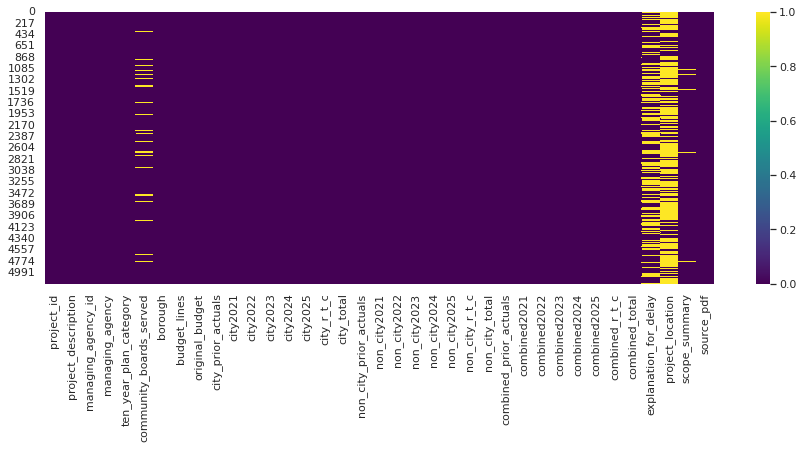

In [11]:
#null visualization
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(df.isnull(), cmap='viridis');

It looks like there are 2 features we may drop, and 2 features we may impute. We will explore more in the EDA section below.

# Exploratory Data Analysis

## Custom function
We find ourselves turning to the same methods and visualizations for univariate analysis. The following function will be utilized to standardize our EDA and simplify code.

In [12]:
def distbox (i,df, type = 'numeric', xlabelrotation = 0, normalize=True):
  """ 
  This function is designed to provide distribution statics and visualizations of dataframe columns
  it takes in a column number and dataframe and can return:
   numerical output -
            1. the skewness of the column
            2. the kurtosis or spread
            3. the descriptive statistics from .describe()
            4. a histogram and boxplot
            
  OR categorical -        
            1. countplot
            2. values counts (either count or as percentages)
  """
  #best practice import dependencies in functions
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings 
  warnings.filterwarnings("ignore", category=FutureWarning)
  c = df.iloc[:,i]
  plt.figure(figsize=(8,4))
  if type =='numeric':
    plt.subplot(1,2,1);#Histogram location
    sns.distplot(c);#calls a histogram
    plt.title(df.columns[i]);#adds title
    plt.subplot(1,2,2);#Boxplot location
    sns.boxplot(c);#calls a box and whisket plot
    plt.title(df.columns[i]);#adds title
    print("Skewness: %f" %c.skew()) #Adds Skew value
    # If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    # If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
    # If the skewness is less than -1 or greater than 1, the data are highly skewed
    print("Kurtosis: %f" %c.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
    # While kurtosis determines the heaviness of the distribution tails.
    # Kurtosis > 3 thin and not spread
    # Kurtosis <3 moderate spread
    print(c.describe()) #Adds summary statistics of the variable


  elif type == 'categorical':
    sns.countplot(c)
    plt.title(df.columns[i]);#adds title
    plt.xticks(rotation = xlabelrotation)#rotates x-labels
    print(c.value_counts(normalize=normalize))

  print("Nullcount: %f" %c.isnull().sum().sum())
  plt.show() # this will load image to console before executing next line of code

### project_id
We will check to see if there are duplicate records based on this feature.

In [13]:

dup = df[df.project_id.duplicated(keep=False)]
dup.head(6)

,project_id,project_description,managing_agency_id,managing_agency,ten_year_plan_category,community_boards_served,borough,budget_lines,original_budget,city_prior_actuals,city2021,city2022,city2023,city2024,city2025,city_r_t_c,city_total,non_city_prior_actuals,non_city2021,non_city2022,non_city2023,non_city2024,non_city2025,non_city_r_t_c,non_city_total,combined_prior_actuals,combined2021,combined2022,combined2023,combined2024,combined2025,combined_r_t_c,combined_total,explanation_for_delay,project_location,scope_summary,source_pdf
229,P-213CNTR,Seaside Park and Community Arts Center Acquisi...,801,DEPT OF SMALL BUSINESS SERVICES,MISCELLANEOUS,300,BROOKLYN,ED-0075,17168,16100,0,0,0,0,0,1068,17168,0,0,0,0,0,0,0,0,16100,0,0,0,0,0,1068,17168,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,SEASIDE PARK AND COMMUNITY ARTS CENTER ACQUISI...,cpd11-20bk.pdf
1018,P-213CNTR,Asser Levy Park Reconstruction,850,DEPT OF DESIGN & CONSTRUCTION,"LARGE, MAJOR AND REGIONAL PARK RECONSTRUCTION",313,BROOKLYN,P-K707 ED-0075,34711,5077,0,0,0,0,5822,0,10899,0,0,0,0,0,0,0,0,5077,0,0,0,0,5822,0,10899,PROJECT DELAYED PENDING RESOLUTION OF LEGAL IS...,CONEY ISLAND CENTER (BROOKLYN),CONEY ISLAND CENTER,cpd11-20bk.pdf
1265,SANDCONDT,Hurricane Sandy Underground Conduits at VCBC,72,DEPARTMENT OF CORRECTION,BUILDING SYSTEMS AND INFRASTRUCTURE,NaN,BRONX,C-0075,14596,0,1219,0,0,0,0,0,1219,0,10977,0,0,0,0,0,10977,0,12196,0,0,0,0,0,12196,PROJECT DELAYED DUE TO BUDGETARY CONSTRAINTS,NaN,HURRICANE SANDY UNDERGROUND CONDUITS AT VCBC,cpd11-20bx.pdf
1455,HBBA24181,"Replacement of WM Infra on E 188 Street, Bronx",826,DEPT ENVIRONMENTAL PROTECTION,AUGMENTATION OF WATER SUPPLY SYSTEMS,206,BRONX,WM-0001,983,0,114,869,0,0,0,0,983,0,0,0,0,0,0,0,0,0,114,869,0,0,0,0,983,NaN,NaN,REPLACEMENT/INSTALLATION OF WATER MAIN INFRAST...,cpd11-20bx.pdf
1487,HBBA24181,East 188th St over MNRR Har BIN 2241810,841,DEPARTMENT OF TRANSPORTATION,FAIR BRIDGES,200,BRONX,HB-1172,30967,1592,1208,0,28967,0,0,0,31767,0,0,0,0,0,0,0,0,1592,1208,0,28967,0,0,0,31767,PROJECT DELAYED DUE TO BUDGETARY CONSTRAINTS,EAST 188TH ST OVER MNRR HAR BIN 2241810,EAST 188TH ST OVER MNRR HAR BIN 2241810,cpd11-20bx.pdf
1885,SANDCONDT,ELECTRICAL CONDUIT REPLACEMENT (SANDY),56,POLICE DEPARTMENT,POLICE FACILITIES,NaN,CITYWIDE,PO-0079,30329,0,404,0,0,0,0,0,404,0,3988,0,0,0,0,0,3988,0,4392,0,0,0,0,0,4392,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NaN,ELECTRICAL,cpd11-20cw.pdf


It appears that although there are some duplicated project_ids, they refer to different projects (or at least different line items in the same project). We will drop this column in the data preparation stage, but do not need to drop the duplicate columns.

### project_description

In [14]:
df.project_description.value_counts()

We will utilize the count vectorizer for this feature to convert these text columns to usable information

### managing_agency_id

846    0.275769
850    0.180577
841    0.080192
801    0.079231
826    0.065000
806    0.062885
856    0.051346
42     0.051154
819    0.034231
56     0.017500
827    0.016346
71     0.015385
57     0.015000
126    0.013462
72     0.011923
39     0.008077
37     0.006154
38     0.004423
816    0.004423
96     0.002692
125    0.001923
68     0.001731
998    0.000192
35     0.000192
858    0.000192
Name: managing_agency_id, dtype: float64
Nullcount: 0.000000


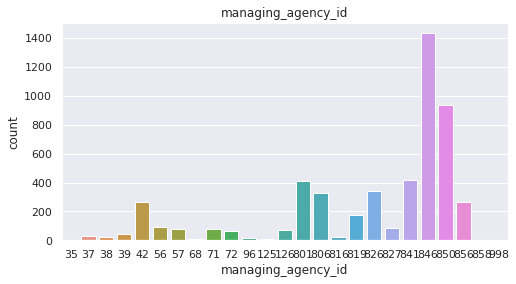

In [15]:
distbox(2,df, 'categorical')

It looks like there are some sparse features here, so we will combine every value below 1%. We will also dummy this feature as it is categorical, and we do not want our models to pull quantitative information from the numeric names.

### managing_agency

DEPT OF PARKS AND RECREATION               0.275769
DEPT OF DESIGN & CONSTRUCTION              0.180577
DEPARTMENT OF TRANSPORTATION               0.080192
DEPT OF SMALL BUSINESS SERVICES            0.079231
DEPT ENVIRONMENTAL PROTECTION              0.065000
HOUSING PRESERVATION AND DEVEL             0.062885
DEPT OF CITYWIDE ADMIN SERVS               0.051346
CITY UNIVERSITY                            0.051154
HEALTH AND HOSPITALS CORP                  0.034231
POLICE DEPARTMENT                          0.017500
DEPARTMENT OF SANITATION                   0.016346
DEPT OF HOMELESS SERVICES                  0.015385
FIRE DEPARTMENT                            0.015000
DEPARTMENT OF CULTURAL AFFAIRS             0.013462
DEPARTMENT OF CORRECTION                   0.011923
QUEENS BOROUGH PUBLIC LIBRARY              0.008077
NEW YORK PUBLIC LIBRARY                    0.006154
BROOKLYN PUBLIC LIBRARY                    0.004423
DEPARTMENT OF HEALTH AND MENTAL HYGIENE    0.004423
HUMAN RESOUR

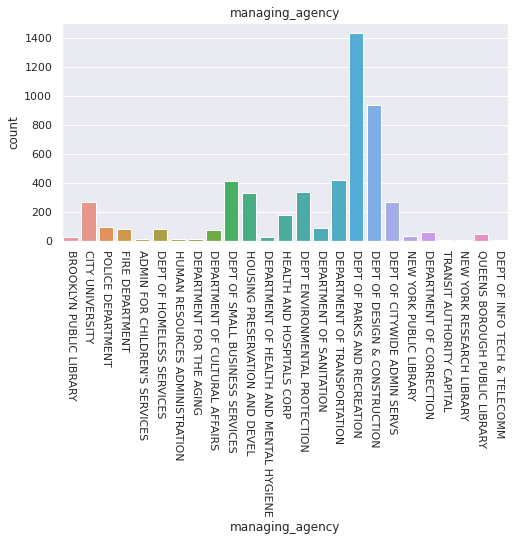

In [16]:
distbox(3,df, 'categorical', 270)

These values line up exactly with the previous feature. We will delete it.

### ten_year_plan_category

NEIGHBORHOOD PARKS AND PLAYGROUNDS               0.162500
LARGE, MAJOR AND REGIONAL PARK RECONSTRUCTION    0.060192
LOW TO MODERATE INCOME PUBLIC HOUSING UPGRADE    0.058846
ESSENTIAL RECONSTRUCTION OF FACILITIES           0.054615
PRIMARY STREET RECONSTRUCTION                    0.050577
                                                   ...   
ELECTRONICS AND DATA PROCESSING                  0.000192
RECONSTRUCTION OF RETAINING WALLS                0.000192
ADMINISTRATION                                   0.000192
ATHLETIC FIELDS, GYMNASIUMS AND EQUIPMENT        0.000192
CAPITAL EQUIPMENT                                0.000192
Name: ten_year_plan_category, Length: 135, dtype: float64
Nullcount: 0.000000


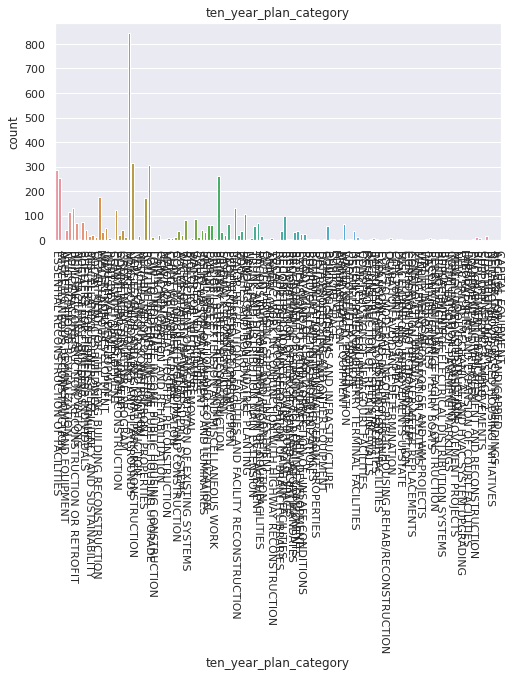

In [17]:
distbox(4,df, 'categorical',270)

There are many sparse categories here. We will combine all features with a count below 25, and then dummy this feature.

### community_boards_served

100                            0.111810
000                            0.108454
400                            0.107405
300                            0.100482
200                            0.066709
                                 ...   
100 105 106                    0.000210
300 308 309 317 318            0.000210
109 112                        0.000210
100 104 105 107 108 110 111    0.000210
200 206 211                    0.000210
Name: community_boards_served, Length: 239, dtype: float64
Nullcount: 433.000000


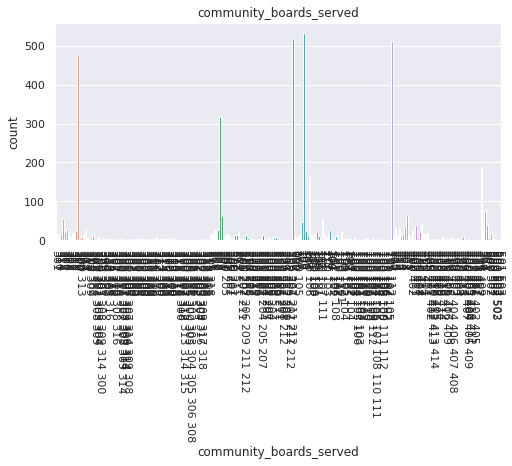

In [18]:
distbox(5,df, 'categorical', 270)

In [19]:
# null check
df.iloc[:,5].isna().sum()

433

we will impute the NAN value to "unknown" and tokenize these to get a consolidated list

### borough

MANHATTAN    0.238462
BROOKLYN     0.215769
QUEENS       0.202885
BRONX        0.143846
CITYWIDE     0.122500
RICHMOND     0.076538
Name: borough, dtype: float64
Nullcount: 0.000000


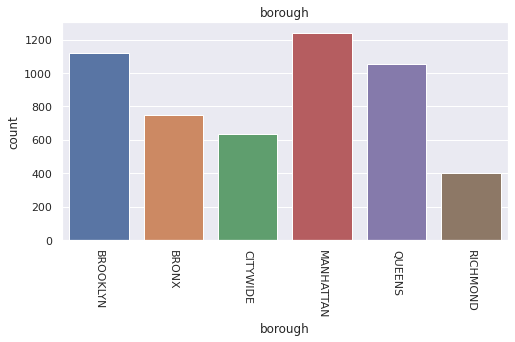

In [20]:
distbox(6,df, 'categorical',270)

Worth noting is that Richmond county is more commonly called Staten Island.

### budget_lines

P-1018                             0.062308
HA-D001                            0.039808
HO-0214                            0.027308
PU-0025                            0.023269
PO-0079                            0.019808
                                     ...   
PU-0025 PV-0475 PV-M475 PV-D475    0.000192
PV-0544                            0.000192
PV-0788 PV-D788                    0.000192
PV-M788 PV-D788 PV-0788            0.000192
HN-0244 HN-0206                    0.000192
Name: budget_lines, Length: 1242, dtype: float64
Nullcount: 0.000000


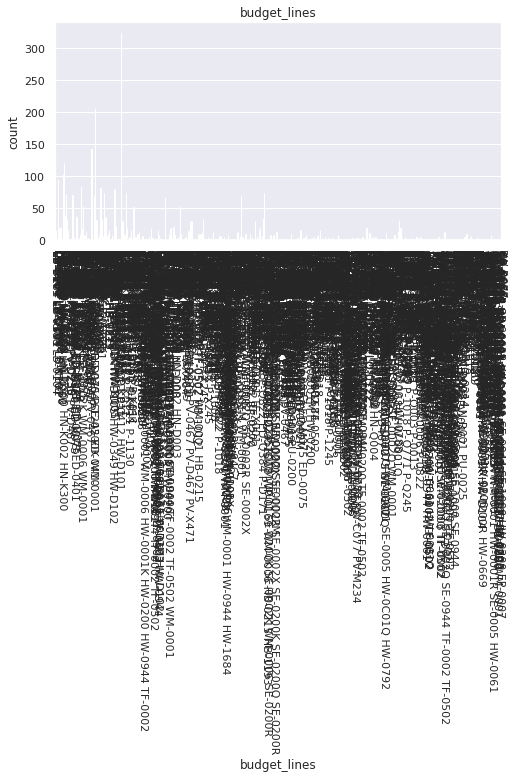

In [21]:
distbox(7,df, 'categorical',270)

We can tokenize these values. We are not clear what the acronyms represent, but we suspect they are categories. We will tokenize them by only taking the first 2 chars of each budget line.

### original_budget

Skewness: 19.185994
Kurtosis: 471.139234
count    5.200000e+03
mean     1.400705e+04
std      7.409468e+04
min      0.000000e+00
25%      6.307500e+02
50%      2.100000e+03
75%      7.597750e+03
max      2.221696e+06
Name: original_budget, dtype: float64
Nullcount: 0.000000


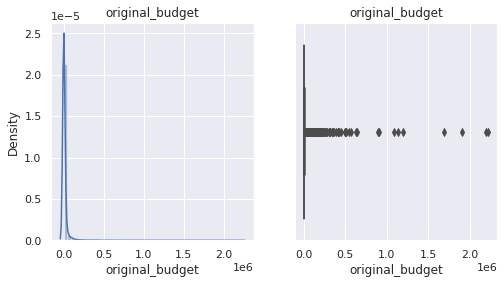

In [22]:
distbox(8,df)

The unit this feature uses is thousands. The distribution looks heavily skewed to the right. We will normalize and standardize to prevent outliers from having a disproportionate effect on the model.

### city_prior_actuals

Skewness: 28.330505
Kurtosis: 1040.555385
count    5.200000e+03
mean     6.941461e+03
std      6.180616e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.670000e+02
75%      1.907000e+03
max      2.826738e+06
Name: city_prior_actuals, dtype: float64
Nullcount: 0.000000


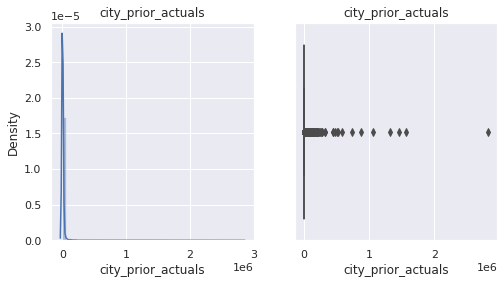

In [23]:
distbox(9,df)

This feature appears to be the amount nyc already spent on the project. It is right skewed, so we will normalize and standardize.

### city2021

Skewness: 35.270107
Kurtosis: 1607.365171
count      5200.000000
mean       1656.726923
std       14362.378740
min      -11585.000000
25%           0.000000
50%          41.000000
75%         500.000000
max      750000.000000
Name: city2021, dtype: float64
Nullcount: 0.000000


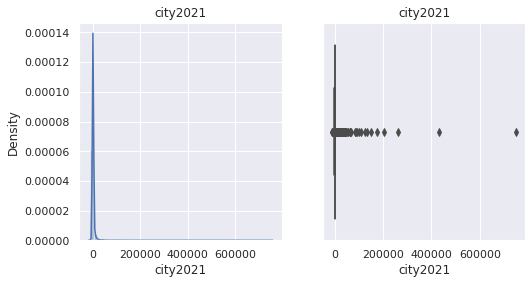

In [24]:
distbox(10,df)

This feature appears to be the amount dedicated to the project in 2021 by nyc. It is right skewed, so we will normalize and standardize.

### City2022-City2024

In [25]:
print('city2021 0 count =',df.city2021.isin([0]).sum())
print('city2022 0 count =',df.city2022.isin([0]).sum())
print('city2023 0 count =',df.city2023.isin([0]).sum())
print('city2024 0 count =',df.city2024.isin([0]).sum())
print('city2025 0 count =',df.city2025.isin([0]).sum())

city2021 0 count = 2384
city2022 0 count = 3572
city2023 0 count = 4245
city2024 0 count = 4353
city2025 0 count = 4720


We see that as the years go by, there are fewer resources dedicated to projects. Whether this is due to a project being completed, or uncertainty in the budget remains unclear. The purpose of this notebook is to predict the final budget for a project; due to the sparsity in the later years budgets, and the goal of this notebook (provide a tool to get a sense of how much money will be dedicated toward a project, based on current knowledge) we will drop the features for years 2022-2025.

### city_r_t_c

Skewness: 19.995482
Kurtosis: 480.570532
count    5.200000e+03
mean     3.293159e+03
std      3.435613e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.123600e+06
Name: city_r_t_c, dtype: float64
Nullcount: 0.000000


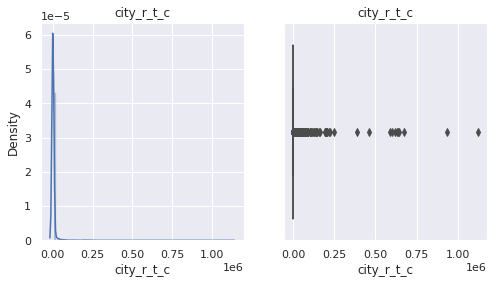

In [26]:
distbox(15,df)

This feature is also right skewed. However, it describes the amount of money that the city will contribute after the projected 5 years. This information will also leak into our response variable, so we will drop it.

### city_total

Skewness: 15.830512
Kurtosis: 295.424748
count    5.200000e+03
mean     1.864759e+04
std      1.074931e+05
min      0.000000e+00
25%      7.500000e+02
50%      2.750000e+03
75%      9.407250e+03
max      2.832260e+06
Name: city_total, dtype: float64
Nullcount: 0.000000


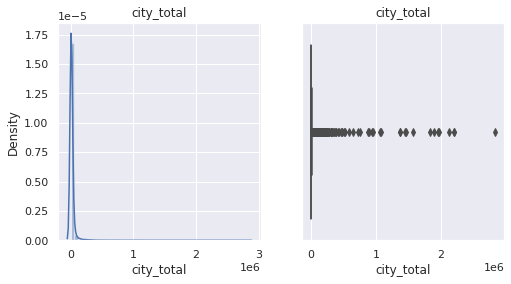

In [27]:
distbox(16,df)

This feature is also right skewed. However, it describes the amount of money that the city will contribute in total. This information will also leak into our response variable, so we will drop it.

### non_city_prior_actuals

Skewness: 26.594468
Kurtosis: 936.158363
count      5200.000000
mean        914.663846
std       10462.350533
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      458330.000000
Name: non_city_prior_actuals, dtype: float64
Nullcount: 0.000000


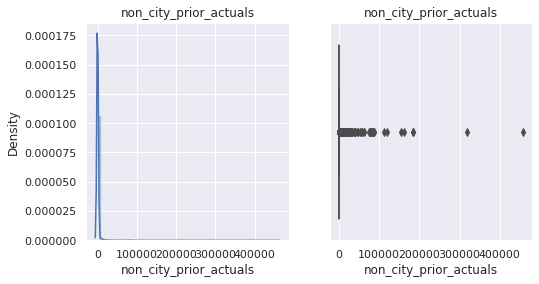

In [28]:
distbox(17,df)

This feature appears to be the amount already spent on the project from non-nyc funds. It is right skewed, so we will normalize and standardize.

### non_city2021

Skewness: 35.093030
Kurtosis: 1356.529087
count      5200.000000
mean        254.290385
std        4442.784597
min        -482.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      194916.000000
Name: non_city2021, dtype: float64
Nullcount: 0.000000


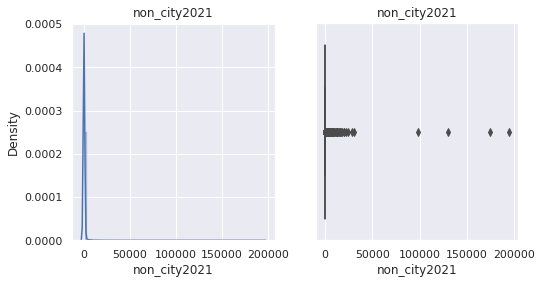

In [29]:
distbox(18,df)

This feature appears to be the amount dedicated to the project in 2021 from non-nyc funds. It is right skewed, so we will normalize and standardize.

### NonCity2022-NonCity2024

In [30]:
print('non_city2021 0 count =',df.city2021.isin([0]).sum())
print('non_city2022 0 count =',df.city2022.isin([0]).sum())
print('non_city2023 0 count =',df.city2023.isin([0]).sum())
print('non_city2024 0 count =',df.city2024.isin([0]).sum())
print('non_city2025 0 count =',df.city2025.isin([0]).sum())

non_city2021 0 count = 2384
non_city2022 0 count = 3572
non_city2023 0 count = 4245
non_city2024 0 count = 4353
non_city2025 0 count = 4720


We see that as the years go by, there are fewer resources dedicated to projects. Whether this is due to a project being completed, or uncertainty in the budget remains unclear. The purpose of this notebook is to predict the final budget for a project; due to the sparsity in the later years budgets, and the goal of this notebook (provide a tool to get a sense of how much money will be dedicated toward a project, based on current knowledge) we will drop the features for years 2022-2025.

### non_city_r_t_c

Skewness: 29.175731
Kurtosis: 1043.895466
count      5200.000000
mean        124.487692
std        2474.861277
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      112674.000000
Name: non_city_r_t_c, dtype: float64
Nullcount: 0.000000


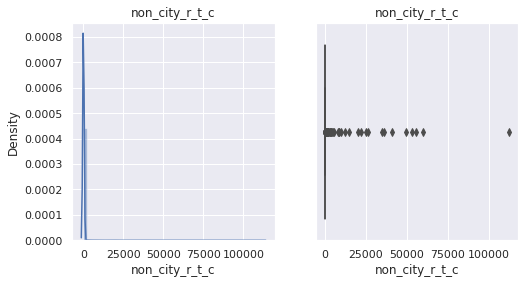

In [31]:
distbox(23,df)

This feature is also right skewed. However, it describes the amount of money that will be contributed after the projected 5 years from non-nyc sources. This information will also leak into our response variable, so we will drop it.

### non_city_total

Skewness: 27.093551
Kurtosis: 1086.925188
count      5200.000000
mean       1694.546923
std       14926.146087
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      714142.000000
Name: non_city_total, dtype: float64
Nullcount: 0.000000


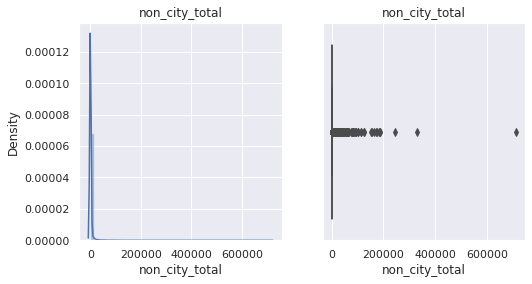

In [32]:
distbox(24,df)

This feature is also right skewed. However, it describes the amount of money that will be contributed in total from non-nyc sources. This information will also leak into our response variable, so we will drop it.

### combined_prior_actuals, combined2021-2025, and combined_r_t_c
We will drop these features as they are just the addition of the city and non-city features, and will provide no additional variance.

### combined_total (TARGET)

Skewness: 15.266752
Kurtosis: 277.994317
count    5.200000e+03
mean     2.034214e+04
std      1.097959e+05
min      3.500000e+01
25%      9.587500e+02
50%      3.214000e+03
75%      1.061250e+04
max      2.832260e+06
Name: combined_total, dtype: float64
Nullcount: 0.000000


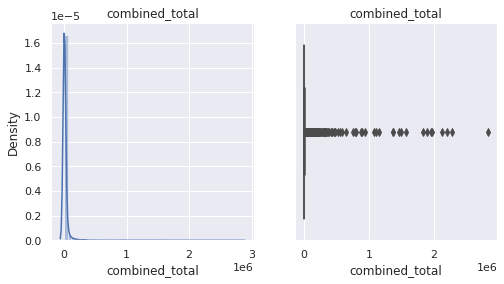

In [33]:
distbox(32,df)

### explanation_for_delay

PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN            0.448324
PROJECT DELAYED DUE TO BUDGETARY CONSTRAINTS              0.319046
PROJECT DELAYED DUE TO UNFORESEEN SITE/FIELD CONDITION    0.194262
PROJECT DELAYED PENDING RESOLUTION OF LEGAL ISSUES        0.020740
PROJECT DELAYED PENDING APPROVAL OF NECESSARY PERMITS     0.006568
PROJECT DELAYED PENDING NON-CITY GRANT APPROVAL           0.004494
PROJECT DELAYED DUE TO UNFORESEEN HAZARDOUS CONDITION     0.002420
PROJECT DELAYED DUE TO SCHEDULING OF UTILITY WORK         0.002074
PROJECT DELAYED DUE TO UNAVAILABILITY OF PRODUCT          0.000691
PROJECT DELAYED PENDING APPROVAL OF STATE REQ CONTRACT    0.000691
PROJECT DELAYED PENDING RELEASE OF NEW TECHNOLOGY         0.000691
Name: explanation_for_delay, dtype: float64
Nullcount: 2307.000000


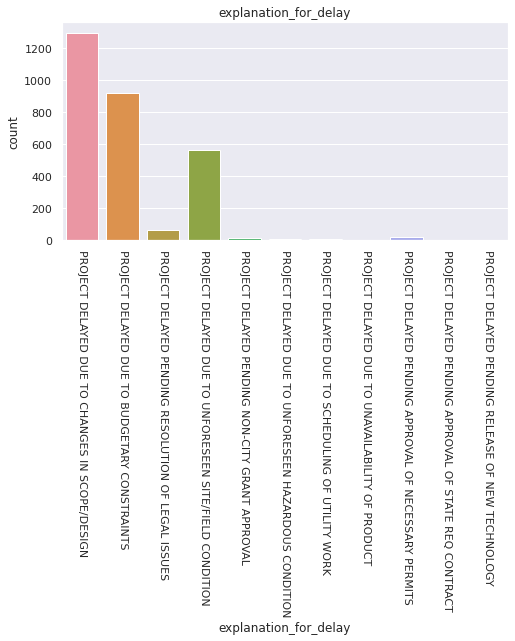

In [34]:
distbox(33,df,'categorical',270)

Nearly 50% of the values for this feature are null. We will transform this feature into an indicator variable "delay_ind" to capture information from this variable.

### project_location

CITYWIDE                                                                             0.035118
BOROUGH OF BROOKLYN                                                                  0.018423
MANHATTAN                                                                            0.017847
QUEENS                                                                               0.017847
BRONX                                                                                0.013241
                                                                                       ...   
BUILDING IS A NEWLY LEASED SPACE LOCATED AT 1920 WEBSTER AVENUE, BRONX, NY 11372.    0.000576
YANKEE STADIUM REQUIRMENTS                                                           0.000576
WOODLAWN PLAYGROUND, VAN CORTLANDT PARK                                              0.000576
FY20 STREET TREES BRONX CB'S 5-8 XG-219M                                             0.000576
ST. GEORGE ESPLANADE STATEN ISLAND                          

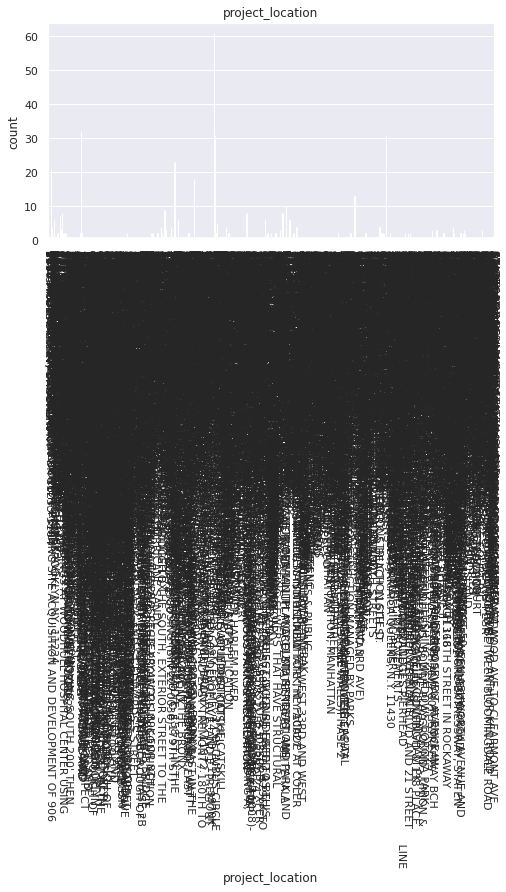

In [35]:
distbox(34,df,'categorical', 270)

The null values of this feature represent over 50% of the data. Of the remaining values, the vast majority are represented in the borough feature. We will drop this feature.

### scope_summary

In [36]:
df.scope_summary.unique()

In [37]:
df.scope_summary.isna().sum()

98

There are a few null values in this column we will populate them with a string value and tokenize the rest of the column to extract any value. 

### source_pdf

This feature reflects the source of the original data. We will drop this feature, as the record location should not impact the target.

## Multivariate Analysis

### Quantitative Independence

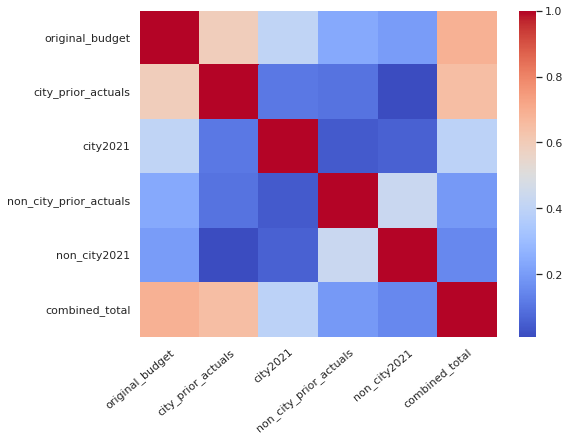

In [38]:
dfm = df[['original_budget','city_prior_actuals','city2021','non_city_prior_actuals','non_city2021',
          'combined_total']]
plt.figure(figsize=(8,6))
sns.heatmap(dfm.corr(),cmap='coolwarm',annot=False);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");
del dfm

It looks like combined_total has strong correlations between both original_budget and city_prior_actuals. We naively expect these features to predict the total amount of money spent on a capital project, and hope we can explain the variance from these features with our categorical data.

# Data Preparation

## Drop Columns

In [39]:
#create data_prep dataframe and drop columns identified in EDA
data_prep = df.drop(['project_id','managing_agency','city2022','city2023','city2024','city2025',
                     'city_r_t_c','city_total','non_city2022','non_city2023','non_city2024','non_city2025',
                     'non_city_r_t_c','non_city_total','combined_prior_actuals','combined2021','combined2022','combined2023',
                     'combined2024','combined2025','combined_r_t_c','project_location','source_pdf'],
                      axis = 1)
#sanity check
data_prep.shape

(5200, 14)

In [40]:
#sanity check2
data_prep.head(5)

,project_description,managing_agency_id,ten_year_plan_category,community_boards_served,borough,budget_lines,original_budget,city_prior_actuals,city2021,non_city_prior_actuals,non_city2021,combined_total,explanation_for_delay,scope_summary
0,ADAMS STREET LIBRARY FIT OUT,38,ESSENTIAL RECONSTRUCTION OF FACILITIES,301,BROOKLYN,LB-0101 LB-0108 LB-0104,5000,0,5000,0,0,5000,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,NEW BRANCH FIT OUT
1,DYKER INTERIOR RENOVATION,38,ESSENTIAL RECONSTRUCTION OF FACILITIES,310,BROOKLYN,LB-D104 LB-K001,1000,0,0,0,0,1657,NaN,DYKER INTERIOR RENOVATION
2,CORTELYOU ROOF,38,ESSENTIAL RECONSTRUCTION OF FACILITIES,314,BROOKLYN,LB-D104,850,0,0,0,0,1266,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,CORTELYOU ROOF
3,FT HAMILTON ROOF,38,ESSENTIAL RECONSTRUCTION OF FACILITIES,310,BROOKLYN,LB-D104,175,0,0,0,0,156,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,FT HAMILTON ROOF
4,GRAVESEND MEETING ROOM,38,ESSENTIAL RECONSTRUCTION OF FACILITIES,315,BROOKLYN,LB-D104,300,0,0,0,0,272,PROJECT DELAYED DUE TO CHANGES IN SCOPE/DESIGN,GRAVESEND MEETING ROOM


## Standardize & Normalize

from sklearn.preprocessing import power_transform as pt 

cash_columns = ['original_budget','city_prior_actuals','city2021','non_city_prior_actuals','non_city2021']

for column in cash_columns:#iterate over identified columns
  a = data_prep[[column]]
  data_prep[column] = pt(a,method='yeo-johnson')#we are performing a yeo-johnson transformation because some of the features have 0 values

data_prep[cash_columns].head(2)#sanity check
y

## Sparse Classes and Indicator Variables
- managing_agency_id: every value below 1%
- ten_year_plan_category: every value below 1%
- explanation_for_delay: indicator variable "delay_ind"

### managing_agency_id sparse features

(16,)


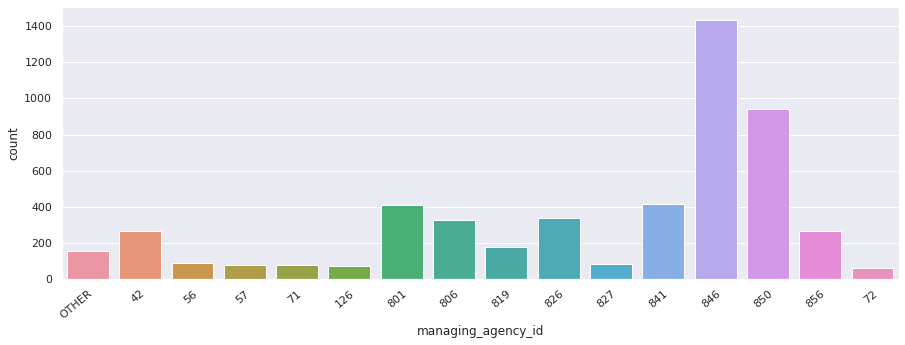

In [41]:
#move data into object for safe mutation
agency = data_prep['managing_agency_id'].copy()

#create mask to identify subgroups <x percent of data
agencylist = agency.value_counts(normalize=True) < .01
agencylist = agencylist[agencylist.values].index
mask = agency.isin(agencylist)

#use mask to update target values
agency[mask] = 'OTHER'

#visualize outcome
print(agency.value_counts().shape)
sns.countplot(agency);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

### ten_year_plan_category sparse features

(25,)


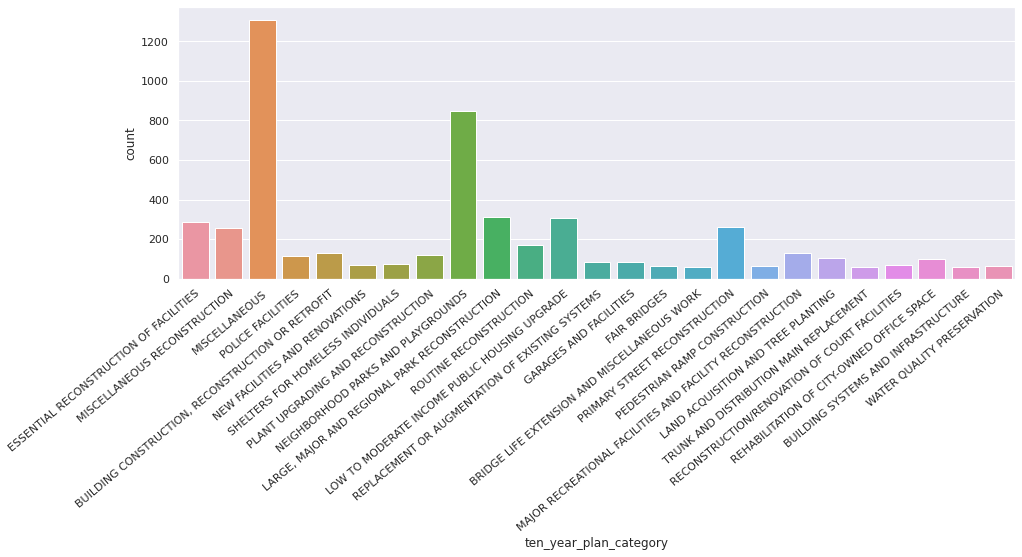

In [42]:
#move data into object for safe mutation
plan = data_prep['ten_year_plan_category'].copy()

#create mask to identify subgroups <x percent of data
planlist = plan.value_counts(normalize=True) < .01
planlist = planlist[planlist.values].index
mask = plan.isin(planlist)

#use mask to update target values
plan[mask] = 'MISCELLANEOUS'# the MISCELLANEOUS value already exists

#visualize outcome
print(plan.value_counts().shape)
sns.countplot(plan);
plt.xticks(rotation=40 , rotation_mode='anchor',ha="right");

### explanation_for_delay indicator

In [43]:
data_prep['delay_ind'] = data_prep.explanation_for_delay.notnull().astype('int')
data_prep['delay_ind'].value_counts()#sanity check

In [44]:
#drop categorical column
data_prep.drop(['explanation_for_delay'],axis = 1,inplace=True)

## Dummy Categorical Data

In [45]:
#Importing to dummy categorical data
from patsy import dmatrix

#dummying managing_agency_id, ten_year_plan_category, subgroup_name, nrc_desc using the patsy library
formula = """-1 + C(managing_agency_id)+ C(ten_year_plan_category) +C(borough)"""
dum = dmatrix(formula, data_prep, return_type='dataframe').astype('int32')
dum.head(2)

,C(managing_agency_id)[35],C(managing_agency_id)[37],C(managing_agency_id)[38],C(managing_agency_id)[39],C(managing_agency_id)[42],C(managing_agency_id)[56],C(managing_agency_id)[57],C(managing_agency_id)[68],C(managing_agency_id)[71],C(managing_agency_id)[72],C(managing_agency_id)[96],C(managing_agency_id)[125],C(managing_agency_id)[126],C(managing_agency_id)[801],C(managing_agency_id)[806],C(managing_agency_id)[816],C(managing_agency_id)[819],C(managing_agency_id)[826],C(managing_agency_id)[827],C(managing_agency_id)[841],C(managing_agency_id)[846],C(managing_agency_id)[850],C(managing_agency_id)[856],C(managing_agency_id)[858],C(managing_agency_id)[998],C(ten_year_plan_category)[T.ADMINISTRATION],C(ten_year_plan_category)[T.ANIMAL CARE],"C(ten_year_plan_category)[T.ATHLETIC FIELDS, GYMNASIUMS AND EQUIPMENT]",C(ten_year_plan_category)[T.AUGMENTATION OF WATER SUPPLY SYSTEMS],C(ten_year_plan_category)[T.BEACHES AND BOARDWALKS],C(ten_year_plan_category)[T.BIOLOGICAL NUTRIENT REMOVAL],C(ten_year_plan_category)[T.BLUEBELT PROGRAM],C(ten_year_plan_category)[T.BOARD OF ELECTIONS MODERNIZATION],C(ten_year_plan_category)[T.BRIDGE FACILITIES],C(ten_year_plan_category)[T.BRIDGE LIFE EXTENSION AND MISCELLANEOUS WORK],"C(ten_year_plan_category)[T.BUILDING CONSTRUCTION, RECONSTRUCTION OR RETROFIT]",C(ten_year_plan_category)[T.BUILDING SYSTEMS AND INFRASTRUCTURE],C(ten_year_plan_category)[T.Bridge Painting],C(ten_year_plan_category)[T.CAPITAL EQUIPMENT],C(ten_year_plan_category)[T.CHILD WELFARE FACILITIES],"C(ten_year_plan_category)[T.CITY TUNNEL NO. 1, RECONSTRUCTION]","C(ten_year_plan_category)[T.CITY TUNNEL NO. 3, STAGE 1]","C(ten_year_plan_category)[T.CITY TUNNEL NO. 3, STAGE 2]",C(ten_year_plan_category)[T.CLINIC RENOVATION AND REHABILITATION],C(ten_year_plan_category)[T.COMMERCIAL DEVELOPMENT],C(ten_year_plan_category)[T.COMMUNICATIONS],C(ten_year_plan_category)[T.COMMUNICATIONS EQUIPMENT],C(ten_year_plan_category)[T.COMMUNITY DEVELOPMENT],C(ten_year_plan_category)[T.CONSENT DECREE UPGRADING AND CONSTRUCTION],C(ten_year_plan_category)[T.CONSERVATION FOR WATER METER REPLACEMENTS],C(ten_year_plan_category)[T.CONSTRUCTION OF NEW COURT FACILITIES],C(ten_year_plan_category)[T.CORROSION PROTECTION SYSTEM],C(ten_year_plan_category)[T.CROTON FILTER PROJECT],C(ten_year_plan_category)[T.DAM SAFETY PROGRAM],C(ten_year_plan_category)[T.DATA PROCESSING AND OTHER EQUIPMENT],C(ten_year_plan_category)[T.DEPARTMENT FOR THE AGING BUILDING RECONSTRUCTION],C(ten_year_plan_category)[T.DISTRIBUTED GENERATION],C(ten_year_plan_category)[T.EAST RIVER BRIDGES],"C(ten_year_plan_category)[T.ELECTRICAL, MECHANICAL AND HVAC SYSTEM UPGRADING]",C(ten_year_plan_category)[T.ELECTRONICS AND DATA PROCESSING],C(ten_year_plan_category)[T.EQUIPMENT],C(ten_year_plan_category)[T.EQUIPMENT AND INTERAGENCY SERVICES],C(ten_year_plan_category)[T.EQUIPMENT AND VEHICLES],C(ten_year_plan_category)[T.ESSENTIAL RECONSTRUCTION OF FACILITIES],C(ten_year_plan_category)[T.EXPANSION AND CONSTRUCTION OF FACILITIES],C(ten_year_plan_category)[T.EXTENSIONS],C(ten_year_plan_category)[T.EXTENSIONS TO ACCOMMODATE NEW DEVELOPMENT],C(ten_year_plan_category)[T.FACILITY PURCHASES AND RECONSTRUCTION],C(ten_year_plan_category)[T.FACILITY RECONSTRUCTION],C(ten_year_plan_category)[T.FAIR BRIDGES],C(ten_year_plan_category)[T.FERRY MAINTENANCE FACILITY CONSTRUCTION],C(ten_year_plan_category)[T.FILTRATION AVOIDANCE DETERMINATION],C(ten_year_plan_category)[T.FINANCING COSTS],C(ten_year_plan_category)[T.GARAGES AND FACILITIES],C(ten_year_plan_category)[T.GREEN INFRASTRUCTURE PROGRAM],C(ten_year_plan_category)[T.IMPROVEMENT AND EXPANSION OF COURT FACILITIES],C(ten_year_plan_category)[T.IMPROVEMENTS TO EXISTING FACILITIES],C(ten_year_plan_category)[T.INDUSTRIAL DEVELOPMENT],C(ten_year_plan_category)[T.INSTALLATION OF LAMPPOSTS AND LUMINAIRES],C(ten_year_plan_category)[T.INSTALLATION OF PAVEMENT MARKINGS],C(ten_year_plan_category)[T.KENSICO-CITY TUNNEL],C(ten_year_plan_category)[T.LABORATORIES],C(ten_year_plan

Now we will replace the categorical values with the dummied data

In [46]:
data_prep.drop(['managing_agency_id','ten_year_plan_category','borough'], axis=1,inplace=True)
data_prep = pd.concat([data_prep, dum], axis=1, )
del dum# deleting to free up memory
data_prep.head(2)

,project_description,community_boards_served,budget_lines,original_budget,city_prior_actuals,city2021,non_city_prior_actuals,non_city2021,combined_total,scope_summary,delay_ind,C(managing_agency_id)[35],C(managing_agency_id)[37],C(managing_agency_id)[38],C(managing_agency_id)[39],C(managing_agency_id)[42],C(managing_agency_id)[56],C(managing_agency_id)[57],C(managing_agency_id)[68],C(managing_agency_id)[71],C(managing_agency_id)[72],C(managing_agency_id)[96],C(managing_agency_id)[125],C(managing_agency_id)[126],C(managing_agency_id)[801],C(managing_agency_id)[806],C(managing_agency_id)[816],C(managing_agency_id)[819],C(managing_agency_id)[826],C(managing_agency_id)[827],C(managing_agency_id)[841],C(managing_agency_id)[846],C(managing_agency_id)[850],C(managing_agency_id)[856],C(managing_agency_id)[858],C(managing_agency_id)[998],C(ten_year_plan_category)[T.ADMINISTRATION],C(ten_year_plan_category)[T.ANIMAL CARE],"C(ten_year_plan_category)[T.ATHLETIC FIELDS, GYMNASIUMS AND EQUIPMENT]",C(ten_year_plan_category)[T.AUGMENTATION OF WATER SUPPLY SYSTEMS],C(ten_year_plan_category)[T.BEACHES AND BOARDWALKS],C(ten_year_plan_category)[T.BIOLOGICAL NUTRIENT REMOVAL],C(ten_year_plan_category)[T.BLUEBELT PROGRAM],C(ten_year_plan_category)[T.BOARD OF ELECTIONS MODERNIZATION],C(ten_year_plan_category)[T.BRIDGE FACILITIES],C(ten_year_plan_category)[T.BRIDGE LIFE EXTENSION AND MISCELLANEOUS WORK],"C(ten_year_plan_category)[T.BUILDING CONSTRUCTION, RECONSTRUCTION OR RETROFIT]",C(ten_year_plan_category)[T.BUILDING SYSTEMS AND INFRASTRUCTURE],C(ten_year_plan_category)[T.Bridge Painting],C(ten_year_plan_category)[T.CAPITAL EQUIPMENT],C(ten_year_plan_category)[T.CHILD WELFARE FACILITIES],"C(ten_year_plan_category)[T.CITY TUNNEL NO. 1, RECONSTRUCTION]","C(ten_year_plan_category)[T.CITY TUNNEL NO. 3, STAGE 1]","C(ten_year_plan_category)[T.CITY TUNNEL NO. 3, STAGE 2]",C(ten_year_plan_category)[T.CLINIC RENOVATION AND REHABILITATION],C(ten_year_plan_category)[T.COMMERCIAL DEVELOPMENT],C(ten_year_plan_category)[T.COMMUNICATIONS],C(ten_year_plan_category)[T.COMMUNICATIONS EQUIPMENT],C(ten_year_plan_category)[T.COMMUNITY DEVELOPMENT],C(ten_year_plan_category)[T.CONSENT DECREE UPGRADING AND CONSTRUCTION],C(ten_year_plan_category)[T.CONSERVATION FOR WATER METER REPLACEMENTS],C(ten_year_plan_category)[T.CONSTRUCTION OF NEW COURT FACILITIES],C(ten_year_plan_category)[T.CORROSION PROTECTION SYSTEM],C(ten_year_plan_category)[T.CROTON FILTER PROJECT],C(ten_year_plan_category)[T.DAM SAFETY PROGRAM],C(ten_year_plan_category)[T.DATA PROCESSING AND OTHER EQUIPMENT],C(ten_year_plan_category)[T.DEPARTMENT FOR THE AGING BUILDING RECONSTRUCTION],C(ten_year_plan_category)[T.DISTRIBUTED GENERATION],C(ten_year_plan_category)[T.EAST RIVER BRIDGES],"C(ten_year_plan_category)[T.ELECTRICAL, MECHANICAL AND HVAC SYSTEM UPGRADING]",C(ten_year_plan_category)[T.ELECTRONICS AND DATA PROCESSING],C(ten_year_plan_category)[T.EQUIPMENT],C(ten_year_plan_category)[T.EQUIPMENT AND INTERAGENCY SERVICES],C(ten_year_plan_category)[T.EQUIPMENT AND VEHICLES],C(ten_year_plan_category)[T.ESSENTIAL RECONSTRUCTION OF FACILITIES],C(ten_year_plan_category)[T.EXPANSION AND CONSTRUCTION OF FACILITIES],C(ten_year_plan_category)[T.EXTENSIONS],C(ten_year_plan_category)[T.EXTENSIONS TO ACCOMMODATE NEW DEVELOPMENT],C(ten_year_plan_category)[T.FACILITY PURCHASES AND RECONSTRUCTION],C(ten_year_plan_category)[T.FACILITY RECONSTRUCTION],C(ten_year_plan_category)[T.FAIR BRIDGES],C(ten_year_plan_category)[T.FERRY MAINTENANCE FACILITY CONSTRUCTION],C(ten_year_plan_category)[T.FILTRATION AVOIDANCE DETERMINATION],C(ten_year_plan_category)[T.FINANCING COSTS],C(ten_year_plan_category)[T.GARAGES AND FACILITIES],C(ten_year_plan_category)[T.GREEN INFRASTRUCTURE PROGRAM],C(ten_year_plan_category)[T.IMPROVEMENT AND EXPANSION OF COURT FACILITIES],C(ten_year_plan_category)[T.IMPROVEMENTS TO EXISTING FACILITIES],C(ten_year_plan_category)[T.INDUSTRIAL DEVELOPMENT],C(ten_year_plan_category)[T.INSTALLATION OF LAMPPOSTS AND LUMIN

## Tokenize Text Columns 

To extract meaningful information, we will modify the following 3 columns: 
1.  project_description:   
    We will utilize Tf-id to try and raise the importance of distinct words  
2.  community_boards_served
3.  budget lines

### project_description
we will utilize the count vectorizer for this to convert these text columns to usable information

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
stops = ['the','of','for','to','at','and']
# project desct
project_description_izer = CountVectorizer(
                                            min_df = 10,
                                            stop_words= stops

                                            )
PD_tokens = project_description_izer.fit_transform(data_prep.project_description) 
PD_tokens

<5200x520 sparse matrix of type '<class 'numpy.int64'>'
	with 17383 stored elements in Compressed Sparse Row format>

In [48]:
project_description_izer.vocabulary_

{'adams': 32,
 'street': 466,
 'library': 276,
 'interior': 261,
 'renovation': 398,
 'roof': 417,
 'ft': 205,
 'hamilton': 232,
 'room': 419,
 'bay': 60,
 'fire': 193,
 'safety': 425,
 'boiler': 72,
 'hill': 243,
 'upgrade': 493,
 'outdoor': 323,
 'plaza': 351,
 'park': 325,
 'avenue': 51,
 'ada': 31,
 'creek': 137,
 'replacement': 403,
 'central': 98,
 'phase': 340,
 'system': 477,
 'wide': 506,
 'funding': 209,
 'new': 310,
 'branch': 77,
 'brooklyn': 83,
 'heights': 239,
 'infrastructure': 257,
 'compliance': 115,
 'rehab': 392,
 'project': 366,
 'hall': 231,
 'upgrades': 494,
 'extension': 178,
 'electrical': 165,
 'college': 108,
 'center': 96,
 'restoration': 409,
 'main': 288,
 'gas': 217,
 'pump': 371,
 'building': 85,
 'performing': 335,
 'arts': 43,
 'renovations': 399,
 'buildings': 86,
 'pool': 358,
 'facilities': 182,
 'replacements': 404,
 'campus': 91,
 'improvements': 255,
 'marina': 292,
 'rehabilitation': 393,
 'athletic': 46,
 'expansion': 176,
 'school': 430,
 'cla

### community_boards_served
we will replace the NAN values discovered during our NAN with 'Unknown' and utilize the count vectorizer 

In [49]:
CB = df.community_boards_served.fillna('unknown')

Comunity_board_izer = CountVectorizer()

CB_tokens = Comunity_board_izer.fit_transform(CB)

CB_tokens

<5200x71 sparse matrix of type '<class 'numpy.int64'>'
	with 6010 stored elements in Compressed Sparse Row format>

In [50]:
Comunity_board_izer.vocabulary_

{'301': 31,
 '310': 40,
 '314': 44,
 '315': 45,
 '302': 32,
 '316': 46,
 '305': 35,
 '303': 33,
 '311': 41,
 '308': 38,
 '318': 48,
 '306': 36,
 '300': 30,
 'unknown': 70,
 '313': 43,
 '304': 34,
 '309': 39,
 '317': 47,
 '307': 37,
 '399': 49,
 '312': 42,
 '211': 27,
 '206': 22,
 '209': 25,
 '208': 24,
 '203': 19,
 '200': 16,
 '201': 17,
 '205': 21,
 '207': 23,
 '212': 28,
 '202': 18,
 '204': 20,
 '210': 26,
 '299': 29,
 '000': 0,
 '099': 1,
 '100': 2,
 '105': 7,
 '109': 11,
 '103': 5,
 '107': 9,
 '106': 8,
 '101': 3,
 '108': 10,
 '102': 4,
 '111': 13,
 '112': 14,
 '104': 6,
 '110': 12,
 '199': 15,
 '400': 50,
 '403': 53,
 '414': 64,
 '406': 56,
 '413': 63,
 '404': 54,
 '408': 58,
 '407': 57,
 '401': 51,
 '411': 61,
 '402': 52,
 '412': 62,
 '405': 55,
 '410': 60,
 '409': 59,
 '499': 65,
 '500': 66,
 '502': 68,
 '501': 67,
 '503': 69}

### budget_lines
For budget lines we will tokenize by only taking the first 2 chars of each budget line

In [51]:
def bl_tokenizer(bl):
    bl_split = bl.split()
    return [x[:2] for x in bl_split]

BL_izer =  CountVectorizer(tokenizer=bl_tokenizer)
BL_tokens = BL_izer.fit_transform(data_prep.budget_lines)
BL_tokens

<5200x35 sparse matrix of type '<class 'numpy.int64'>'
	with 5708 stored elements in Compressed Sparse Row format>

In [52]:
BL_izer.vocabulary_

{'lb': 19,
 'hn': 14,
 'ed': 5,
 'po': 23,
 'pu': 24,
 'f-': 7,
 'cs': 4,
 'hh': 12,
 'hr': 16,
 'ag': 0,
 'pv': 25,
 'p-': 22,
 're': 27,
 'se': 29,
 'wm': 33,
 'wp': 34,
 'hw': 17,
 'hb': 10,
 'fa': 8,
 'pw': 26,
 'ho': 15,
 'ha': 9,
 'hl': 13,
 'ep': 6,
 's-': 28,
 'tf': 31,
 'c-': 2,
 'co': 3,
 'hd': 11,
 'ln': 20,
 'w-': 32,
 'br': 1,
 't-': 30,
 'l-': 18,
 'lq': 21}

### scope_summary

In [53]:
SS = df.scope_summary.fillna('unknown')
SS_izer = CountVectorizer(  
                            min_df=10,
                            stop_words=stops
                        )   
SS_tokens = SS_izer.fit_transform(SS)

SS_tokens

<5200x506 sparse matrix of type '<class 'numpy.int64'>'
	with 18207 stored elements in Compressed Sparse Row format>

In [54]:
d = SS_izer.vocabulary_

In [55]:
data_prep.drop(['project_description','budget_lines','community_boards_served','scope_summary'], 
               axis=1,inplace=True)#tokenized features will be added during the modeling phase, to make it easier to review the other changes

data_prep.head(2)

,original_budget,city_prior_actuals,city2021,non_city_prior_actuals,non_city2021,combined_total,delay_ind,C(managing_agency_id)[35],C(managing_agency_id)[37],C(managing_agency_id)[38],C(managing_agency_id)[39],C(managing_agency_id)[42],C(managing_agency_id)[56],C(managing_agency_id)[57],C(managing_agency_id)[68],C(managing_agency_id)[71],C(managing_agency_id)[72],C(managing_agency_id)[96],C(managing_agency_id)[125],C(managing_agency_id)[126],C(managing_agency_id)[801],C(managing_agency_id)[806],C(managing_agency_id)[816],C(managing_agency_id)[819],C(managing_agency_id)[826],C(managing_agency_id)[827],C(managing_agency_id)[841],C(managing_agency_id)[846],C(managing_agency_id)[850],C(managing_agency_id)[856],C(managing_agency_id)[858],C(managing_agency_id)[998],C(ten_year_plan_category)[T.ADMINISTRATION],C(ten_year_plan_category)[T.ANIMAL CARE],"C(ten_year_plan_category)[T.ATHLETIC FIELDS, GYMNASIUMS AND EQUIPMENT]",C(ten_year_plan_category)[T.AUGMENTATION OF WATER SUPPLY SYSTEMS],C(ten_year_plan_category)[T.BEACHES AND BOARDWALKS],C(ten_year_plan_category)[T.BIOLOGICAL NUTRIENT REMOVAL],C(ten_year_plan_category)[T.BLUEBELT PROGRAM],C(ten_year_plan_category)[T.BOARD OF ELECTIONS MODERNIZATION],C(ten_year_plan_category)[T.BRIDGE FACILITIES],C(ten_year_plan_category)[T.BRIDGE LIFE EXTENSION AND MISCELLANEOUS WORK],"C(ten_year_plan_category)[T.BUILDING CONSTRUCTION, RECONSTRUCTION OR RETROFIT]",C(ten_year_plan_category)[T.BUILDING SYSTEMS AND INFRASTRUCTURE],C(ten_year_plan_category)[T.Bridge Painting],C(ten_year_plan_category)[T.CAPITAL EQUIPMENT],C(ten_year_plan_category)[T.CHILD WELFARE FACILITIES],"C(ten_year_plan_category)[T.CITY TUNNEL NO. 1, RECONSTRUCTION]","C(ten_year_plan_category)[T.CITY TUNNEL NO. 3, STAGE 1]","C(ten_year_plan_category)[T.CITY TUNNEL NO. 3, STAGE 2]",C(ten_year_plan_category)[T.CLINIC RENOVATION AND REHABILITATION],C(ten_year_plan_category)[T.COMMERCIAL DEVELOPMENT],C(ten_year_plan_category)[T.COMMUNICATIONS],C(ten_year_plan_category)[T.COMMUNICATIONS EQUIPMENT],C(ten_year_plan_category)[T.COMMUNITY DEVELOPMENT],C(ten_year_plan_category)[T.CONSENT DECREE UPGRADING AND CONSTRUCTION],C(ten_year_plan_category)[T.CONSERVATION FOR WATER METER REPLACEMENTS],C(ten_year_plan_category)[T.CONSTRUCTION OF NEW COURT FACILITIES],C(ten_year_plan_category)[T.CORROSION PROTECTION SYSTEM],C(ten_year_plan_category)[T.CROTON FILTER PROJECT],C(ten_year_plan_category)[T.DAM SAFETY PROGRAM],C(ten_year_plan_category)[T.DATA PROCESSING AND OTHER EQUIPMENT],C(ten_year_plan_category)[T.DEPARTMENT FOR THE AGING BUILDING RECONSTRUCTION],C(ten_year_plan_category)[T.DISTRIBUTED GENERATION],C(ten_year_plan_category)[T.EAST RIVER BRIDGES],"C(ten_year_plan_category)[T.ELECTRICAL, MECHANICAL AND HVAC SYSTEM UPGRADING]",C(ten_year_plan_category)[T.ELECTRONICS AND DATA PROCESSING],C(ten_year_plan_category)[T.EQUIPMENT],C(ten_year_plan_category)[T.EQUIPMENT AND INTERAGENCY SERVICES],C(ten_year_plan_category)[T.EQUIPMENT AND VEHICLES],C(ten_year_plan_category)[T.ESSENTIAL RECONSTRUCTION OF FACILITIES],C(ten_year_plan_category)[T.EXPANSION AND CONSTRUCTION OF FACILITIES],C(ten_year_plan_category)[T.EXTENSIONS],C(ten_year_plan_category)[T.EXTENSIONS TO ACCOMMODATE NEW DEVELOPMENT],C(ten_year_plan_category)[T.FACILITY PURCHASES AND RECONSTRUCTION],C(ten_year_plan_category)[T.FACILITY RECONSTRUCTION],C(ten_year_plan_category)[T.FAIR BRIDGES],C(ten_year_plan_category)[T.FERRY MAINTENANCE FACILITY CONSTRUCTION],C(ten_year_plan_category)[T.FILTRATION AVOIDANCE DETERMINATION],C(ten_year_plan_category)[T.FINANCING COSTS],C(ten_year_plan_category)[T.GARAGES AND FACILITIES],C(ten_year_plan_category)[T.GREEN INFRASTRUCTURE PROGRAM],C(ten_year_plan_category)[T.IMPROVEMENT AND EXPANSION OF COURT FACILITIES],C(ten_year_plan_category)[T.IMPROVEMENTS TO EXISTING FACILITIES],C(ten_year_plan_category)[T.INDUSTRIAL DEVELOPMENT],C(ten_year_plan_category)[T.INSTALLATION OF LAMPPOSTS AND LUMINAIRES],C(ten_year_plan_category)[T.INSTALLATION OF PAVEMENT MARKINGS],C

# Prepped Data Review

Originally, we standardized and normalized the quantitative features. This impacted our models negatively, so we left them unaltered. `original_budget`, `city_prior_actuals`, `city2021`, `non_city_prior_actuals`, `non_city2021`,and `combined_total` have not changed. The other categorical columns have been tokenized and vectorized, which do not allow for much in the way of data review. 

The only column we will explore here is our delay_ind, which shows if a dealy description was recorded.

1    0.556346
0    0.443654
Name: delay_ind, dtype: float64
Nullcount: 0.000000


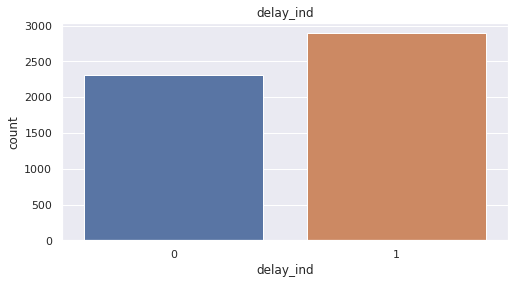

In [56]:
distbox(6,data_prep,'categorical')

This feature is relatively balanced and much improved.

# Machine Learning Models 
- We will first make sure all of our data is ready and in a usable form for modeling
- We will then split our data into training and testing sets
- We will create a baseline model to give us something to compare models against
- Select features manually, using Recursive Feature Elimination
- Perform Linear Regression Models for budget and schedule on the feature sets
- We will then construct a Random Forest model on our best feature set
- We will also construct an XGBoost model

## Sparse Matrix Creation
Because a large amount of our data is sparse tokens, we will convert and combine all our dataframes to a single sparse matrix to enable the most efficient modeling building.

In [57]:
from scipy.sparse import csr_matrix, hstack
#droping target and pre tokenized  columns 
drop_columns = ['combined_total']
X = data_prep.drop(drop_columns, axis = 1)
columns = X.columns.values
# converting data frame to sparse
X = csr_matrix(X.values)

#appending tokenized columns
X = hstack([X,PD_tokens,CB_tokens,BL_tokens,SS_tokens])

In [58]:
# appending proejct descritpion column names
d = project_description_izer.vocabulary_

full_collumns = np.append(columns, [f'PD_{x}' for x in sorted(d,key=d.get)])
# appending community board columns names
d = Comunity_board_izer.vocabulary_
full_collumns = np.append(full_collumns, [f'CB_{x}' for x in sorted(d,key=d.get)])
# appending Budget lines
d = BL_izer.vocabulary_
full_collumns = np.append(full_collumns, [f'Bl_{x}' for x in sorted(d,key=d.get)])
#appending scope summary
d = SS_izer.vocabulary_
full_collumns = np.append(full_collumns, [f'SS_{x}' for x in sorted(d,key=d.get)])


#checking
full_collumns.shape

(1302,)

In [59]:
columns

## Test/Train Split

In [60]:
# assigning target 

y = data_prep.combined_total

# split the data into training + testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)
X_train.shape

(4160, 1302)

## Feature Selection
For this section we used code from Towards Data Science to improve our model: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

import statsmodels as sm

#create a function that will tell us which variables have a p-value less than .05.
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [61]:
import pickle
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

# if we have already run and pickled the rfecv object we can just load it instead of reruning 
try:
    with open("rfecv.pkl", 'rb') as file:
        rfecv = pickle.load(file)

except FileNotFoundError: # if object not foundls

    regr = DecisionTreeRegressor()
    folds = KFold(n_splits=3, shuffle=True)

    rfecv = RFECV( regr, 
                    cv=folds, 
                    min_features_to_select=20,
                    scoring='r2',
                    n_jobs = -1
                    )
    rfecv.fit(X_train,y_train)
    #once fit is done we save the object so that reruns do not delay the whole process instead just unpickle 
    with open('rfecv.pkl','wb') as file:
        pickle.dump(rfecv,file)

Optimal number of features : 985


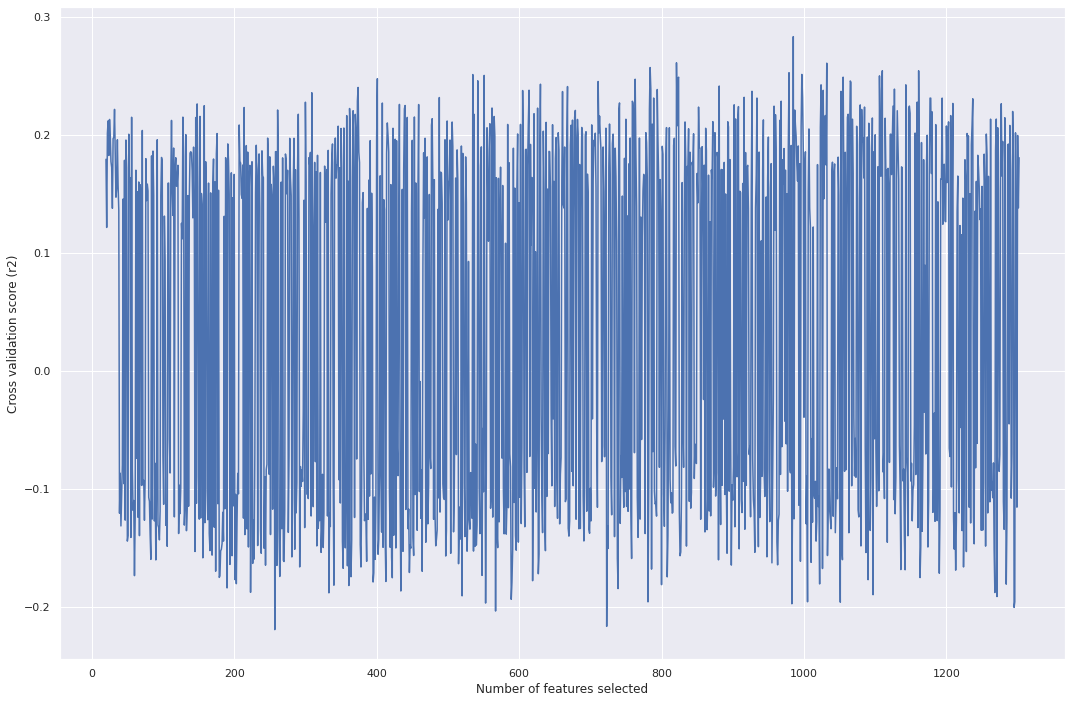

In [62]:
import matplotlib.pyplot as plt
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize =(18,12))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(
    range(20, len(rfecv.grid_scores_) + 20),
    np.mean(rfecv.grid_scores_,axis=1),
)
plt.show()

In [63]:
full_collumns[rfecv.support_]

In [64]:
#saving orginal 
X_train_old = X_train
X_test_old = X_test


#updating with rfecv selected values
X_train = X_train[:,rfecv.support_]
X_test = X_test[:,rfecv.support_]

X_train

<4160x985 sparse matrix of type '<class 'numpy.int64'>'
	with 56583 stored elements in Compressed Sparse Row format>

From those results, we see which variables we should include and will overwrite the dataframe with just those variables.

## Baseline Model
A baseline regression model will give us something to compare our other models to. We will use;
- Co-efficient of Determination (r^2): The default result of the .score method in sklearn. This number explains the percent of the variation of the input data that the prediction captures.
- Root Mean Squared Error (RMSE): Uses the mean_square_error function. This penalizes large errors.
- Mean Squared Logarithmic Error (MSLE): Uses the mean_squared_log_error function. This penalizes under-prediction more than over-prediction, and will be our most important measure.

In [65]:
from sklearn.dummy import DummyRegressor
from sklearn import metrics
dr = DummyRegressor()
dr.fit(X_train, y_train)
y_pred = dr.predict(X_train)
print(f"Baseline  r^2: {dr.score(X_train, y_train)}")
print(f"Baseline RMSE: {metrics.mean_squared_error(y_train,y_pred)}")
print(f"Baseline MSLE: {metrics.mean_squared_log_error(y_train,y_pred)}")

Baseline  r^2: 0.0
Baseline RMSE: 9524549313.968618
Baseline MSLE: 6.340377265469793


## Linear Regression Model

In [66]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_validate 

# choose the model function you want to use to a variable
lr = LinearRegression()

# fit the model using 5-fold cross validation. This gives a more robust score our model.
scores = cross_validate(lr, X_train, y_train, 
                         scoring=('r2',
                                  #'neg_mean_squared_log_error',#commented out because it throws erros due to negative numbers
                                  'neg_mean_squared_error'
                                 ),
                         cv=5)

# calculate the average scores across all 5 folds
lr_r2 =   np.mean(scores['test_r2'])
lr_rmse = np.mean(scores['test_neg_mean_squared_error'])
#lr_mlse = np.mean(scores['test_neg_mean_squared_log_error'])

print(f"Linear Regression  r^2: {lr_r2}")
print(f"Linear Regression RMSE: {lr_rmse}")
#print(f"Linear Regression MLSE: {lr_mlse}")

Linear Regression  r^2: 0.4103782456955189
Linear Regression RMSE: -4473514039.585932


### Feature Importance

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


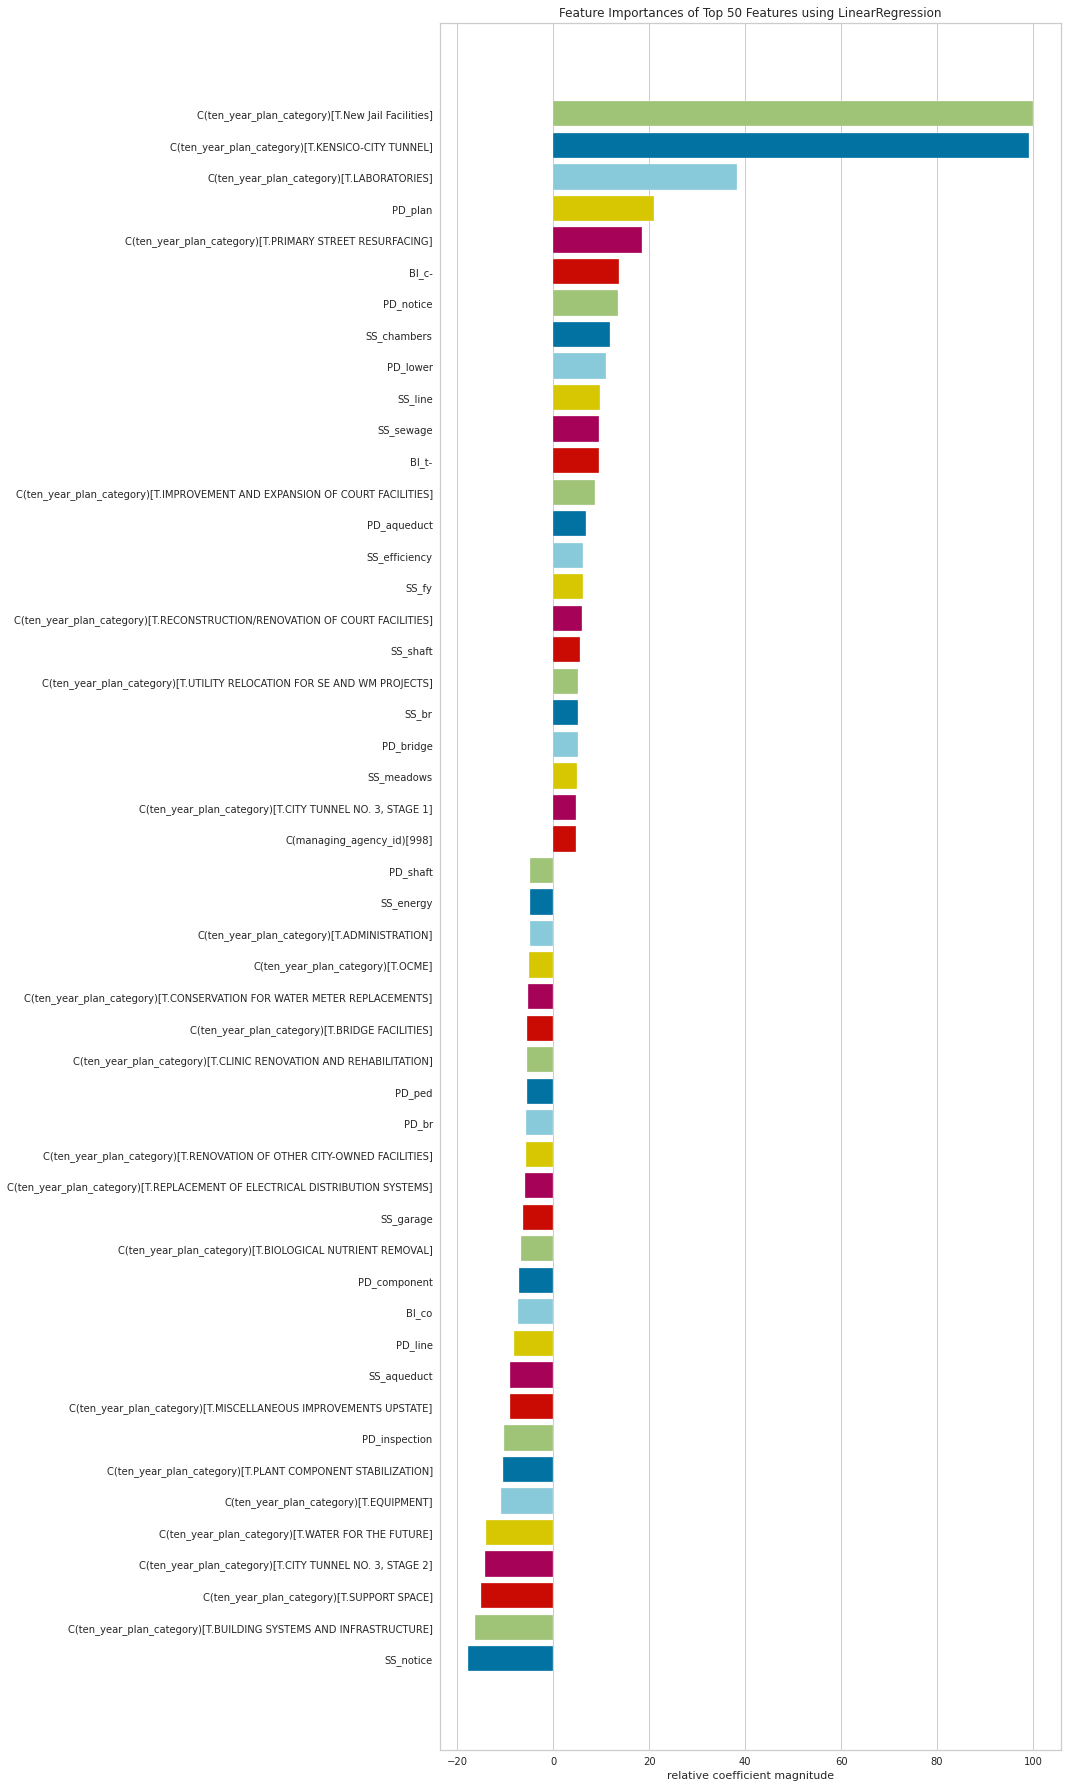

In [67]:
from yellowbrick.features import FeatureImportances

fig, ax = plt.subplots(figsize=(15, 25))
fi_viz = FeatureImportances(
                            lr,
                            labels= full_collumns[rfecv.support_],
                            topn= 50
                              )
fi_viz.fit(X_train, y_train)
fi_viz.show();

## Random Forest Model
we will first train a model with default Params. Then we will attempt to tune.

In [74]:

rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)
rfr.fit(X_train, y_train)

# fit the model using 5-fold cross validation. This gives a more robust score our model.
rfr_scores = cross_validate(rfr, X_train, y_train, 
                         scoring=('r2', 'neg_mean_squared_error','neg_mean_squared_log_error'),
                         cv=5)

# calculate the average scores across all 5 folds
rfr_r2 =   np.mean(rfr_scores['test_r2'])
rfr_rmse = np.mean(rfr_scores['test_neg_mean_squared_error'])
rfr_mlse = np.mean(rfr_scores['test_neg_mean_squared_log_error'])

print(f"Random Forest Regression  r^2: {rfr_r2}")
print(f"Random Forest Regression RMSE: {rfr_rmse}")
print(f"Random Forest Regression MLSE: {rfr_mlse}")

Random Forest Regression  r^2: 0.49320402301097077
Random Forest Regression RMSE: -4449195919.423822
Random Forest Regression MLSE: -0.5040547945800764


### Random Forest Tuning 

In [0]:
from ray.tune.sklearn import TuneSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter_grid =   {'bootstrap': [True, False],
                    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                    'max_features': ['auto', 'sqrt'],
                    'min_samples_leaf': [1, 2, 4],
                    'min_samples_split': [2, 5, 10],
                   # 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
                    }
               

rfr2 = RandomForestRegressor(random_state=42)
tune_search = TuneSearchCV(
    rfr2,
    parameter_grid,
    search_optimization="bayesian",
    n_trials=3,
    early_stopping=True,
    max_iters=10,
    use_gpu=True,
    n_jobs=-1,
    scoring = ('r2', 'neg_mean_squared_error','neg_mean_squared_log_error'),
    refit= 'neg_mean_squared_error'
                        )


tune_search.fit(X_train,y_train, )

In [0]:
rfr2 = tune_search.best_estimator_

rfr2_scores = cross_validate(rfr2, X_train, y_train, 
                         scoring=('r2', 'neg_mean_squared_error','neg_mean_squared_log_error'),
                         cv=5)
# calculate the average scores across all 5 folds
rfr2_r2 =   np.mean(rfr2_scores['test_r2'])
rfr2_rmse = np.mean(rfr2_scores['test_neg_mean_squared_error'])
rfr2_mlse = np.mean(rfr2_scores['test_neg_mean_squared_log_error'])

print(f"Random Forest Regression  r^2: {rfr2_r2}")
print(f"Random Forest Regression RMSE: {rfr2_rmse}")
print(f"Random Forest Regression MLSE: {rfr2_mlse}")

**conclusions:** 
The tuned model under performed. We will stick with the base model.

### Feature Importance

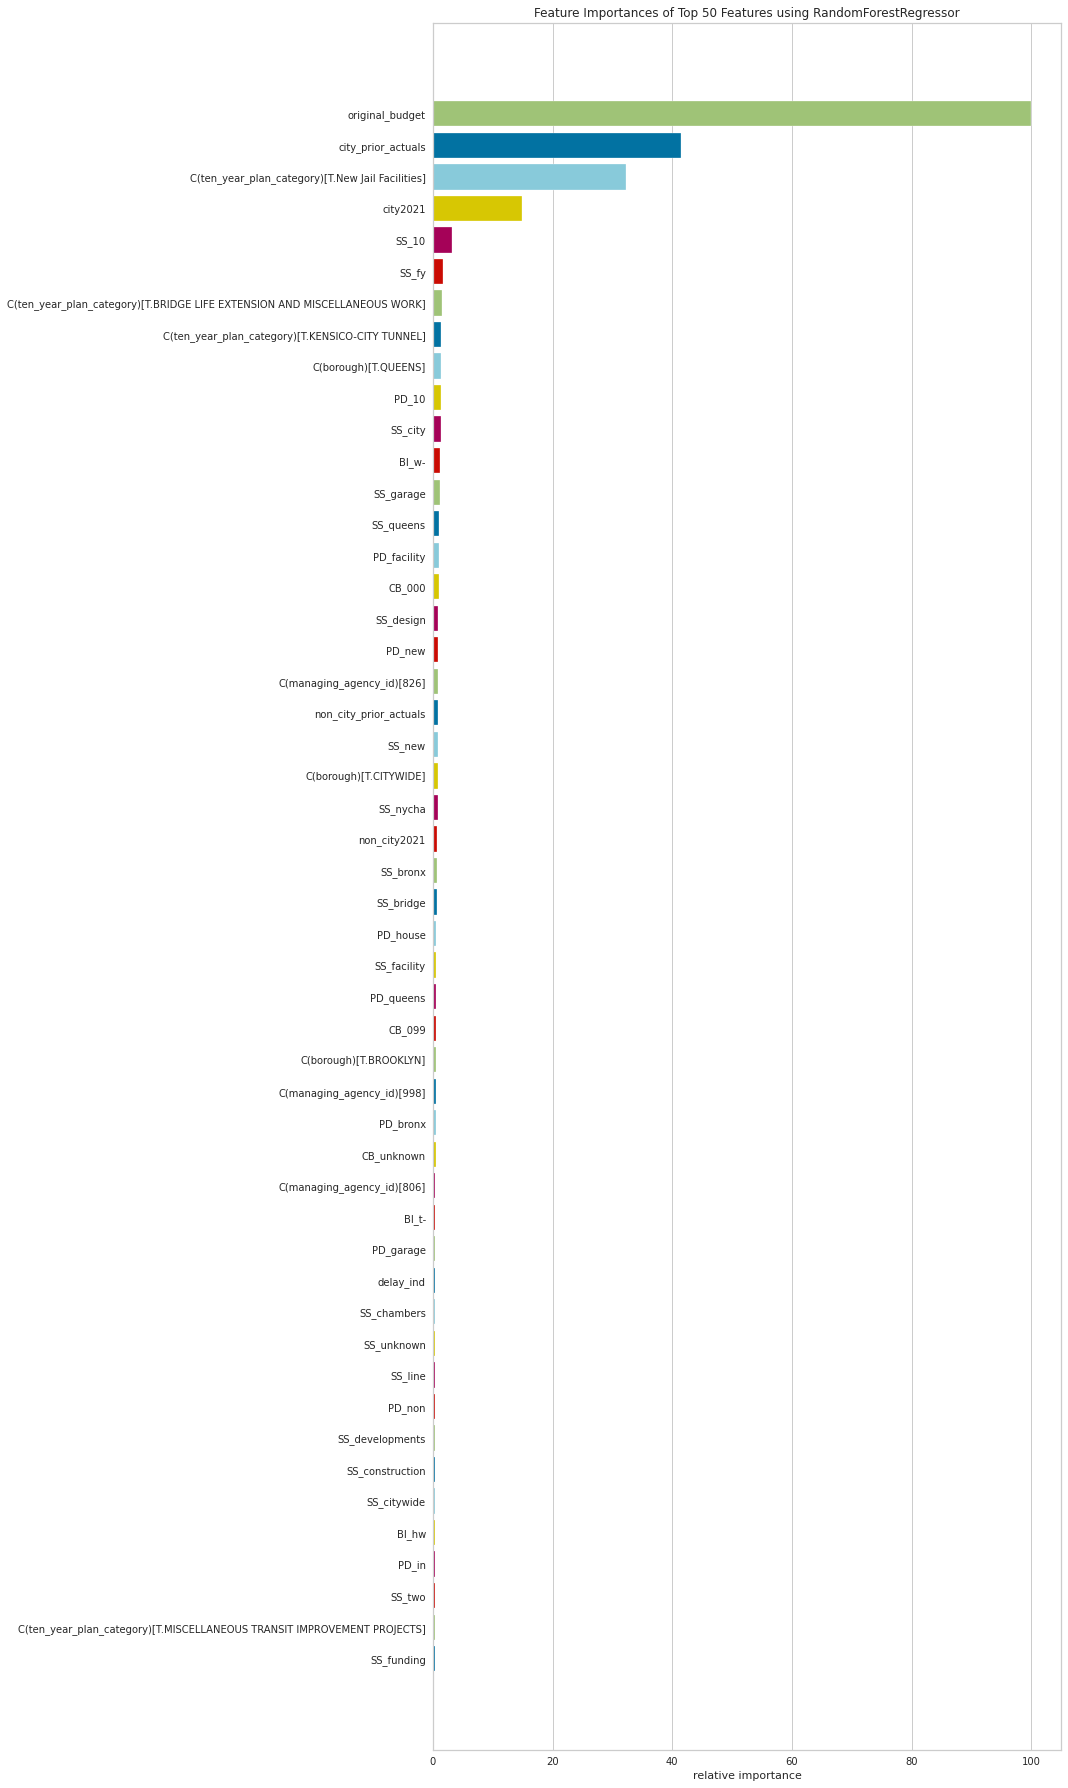

In [125]:
fig, ax = plt.subplots(figsize=(15, 25))
fi_viz = FeatureImportances(
                            rfr,
                            labels= full_collumns[rfecv.support_],
                            topn= 50
                              )
fi_viz.fit(X_train, y_train)
fi_viz.show();

## XGBoost Model
We will first build a base model without the hyper-parameters set
We will then tune the model utilizing a Bayesian optimization 

In [79]:
import xgboost as xgb
xgr = xgb.XGBRegressor(random_state=42)
xgr.fit(X_train, y_train)

# fit the model using 5-fold cross validation. This gives a more robust score our model.
xgr_scores = cross_validate(xgr, X_train, y_train, 
                            scoring=('r2', 'neg_mean_squared_error',
                                    #'neg_mean_squared_log_error'#commented out because it throws erros due to negative numbers
                                    ),
                            cv=5)

# calculate the average scores across all 5 folds
xgr_r2 =   np.mean(xgr_scores['test_r2'])
xgr_rmse = np.mean(xgr_scores['test_neg_mean_squared_error'])
#xgr_mlse = np.mean(xgr_scores['test_neg_mean_squared_log_error'])

print(f"XGBoost Regression  r^2: {xgr_r2}")
print(f"XGBoost Regression RMSE: {xgr_rmse}")
#print(f"XGBoost Regression MLSE: {xgr_mlse}"

XGBoost Regression  r^2: 0.45282276125015863
XGBoost Regression RMSE: -4716814683.900339


### XGBoost Tuning

In [81]:
parameter_grid =   { 'learning_rate' : [.1,.2,.3,.4,.5,.6],
                    'max_depth': [3,6, 9, 12, 18, 24, 30, None],
                     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
                    }
               
xgr2 = xgb.XGBRegressor(random_state=42)
tune_search2 = TuneSearchCV(
    xgr2,
    parameter_grid,
    search_optimization="bayesian",
    n_trials=3,
    #early_stopping=True,
    max_iters=10,
    use_gpu=True,
    n_jobs=-1,
    scoring = ('r2', 'neg_mean_squared_error'),
    refit= 'neg_mean_squared_error'
                        )


tune_search2.fit(X_train,y_train, )

/opt/python/envs/default/lib/python3.8/site-packages/tune_sklearn/tune_basesearch.py:435: UserWarning: tune-sklearn implements incremental learning for xgboost models following this: https://github.com/dmlc/xgboost/issues/1686. This may negatively impact performance. To disable, set `early_stopping=False`.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/ray/tune/tune.py:373: UserWarning: The `loggers` argument is deprecated. Please pass the respective `LoggerCallback` classes to the `callbacks` argument instead. See https://docs.ray.io/en/latest/tune/api_docs/logging.html
  warnings.warn(


TuneSearchCV(early_stopping=<ray.tune.schedulers.async_hyperband.AsyncHyperBandScheduler object at 0x7f018936d940>,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, ma...
             param_distributions={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                    0.6],
                                  'max_depth': [3, 6, 9, 12, 18, 24, 30, None],
                                  'n_estimators': [200, 400, 600, 800, 1000,
                                                   1200, 1400, 1600, 1800,

In [82]:
xgr2 = tune_search.best_estimator_

xgr2_scores = cross_validate(xgr2, X_train, y_train, 
                         scoring=('r2', 'neg_mean_squared_error'),
                         cv=5)
# calculate the average scores across all 5 folds
xgr2_r2 =   np.mean(xgr2_scores['test_r2'])
xgr2_rmse = np.mean(xgr2_scores['test_neg_mean_squared_error'])
#xgr2_mlse = np.mean(xgr2_scores['test_neg_mean_squared_log_error'])

print(f"Random Forest Regression  r^2: {xgr2_r2}")
print(f"Random Forest Regression RMSE: {xgr2_rmse}")
#print(f"Random Forest Regression MLSE: {xgr2_mlse}")

Random Forest Regression  r^2: 0.47464354775913387
Random Forest Regression RMSE: -4539382990.55497


**conclusion** our tuned model outperformed the base model we will utilize it moving forward 

### Feature Importance

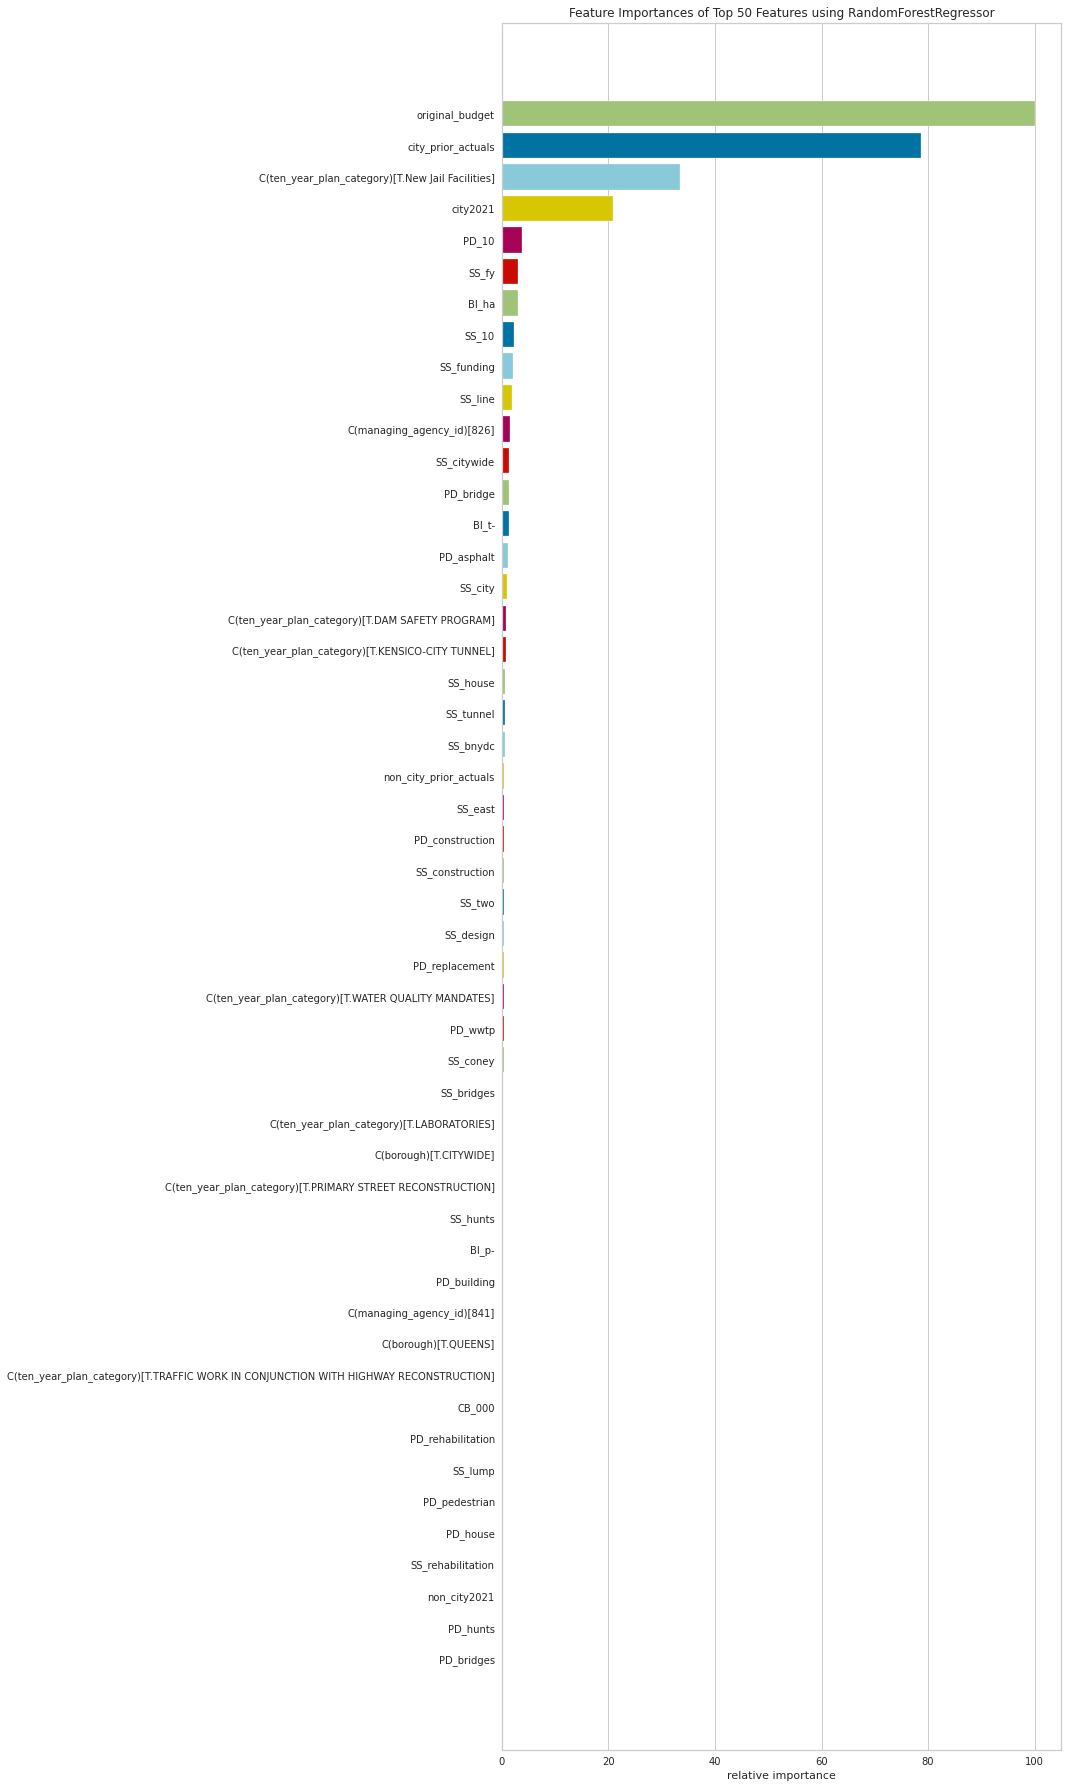

In [83]:
fig, ax = plt.subplots(figsize=(15, 25))
fi_viz = FeatureImportances(
                            xgr2, 
                            labels= full_collumns[rfecv.support_],
                            topn= 50
                              )
fi_viz.fit(X_train, y_train)
fi_viz.show();

# Model Selection



## Model Summary (Training Data)

|      Model             |      r^2     |      RMSE         |   MSLE   | 
|       :-:              |      :-:     |      :-:          |   :--:   |
|     Baseline           |    0.0000    |   9,524,549,313   |  6.3404  |  
|     Linear Regression  |    0.4104    |  -4,473,514,039   |   NAN    |
|     Random Forest      |    0.4932    |  -4,449,195,919   | -0.5041  |
|     XGBoost            |    0.4746    |  -4,539,382,990   |   NAN    |

Ideally, we would choose the MSLE score as our primary determinant, but some of our models do not process this score because of negative numbers. The next most important metric is the RMSE, which penalizes large errors. The closest metric to 0 is the best for RMSE. We also want the r^2 score to be as close to 1 as possible. Our models are not very good, but the best in both metrics is the Random Forest. We will substantiate now with the test set.

In [137]:
# fit the model using 5-fold cross validation. This gives a more robust score our model.
rfr_scores = cross_validate(rfr, X_test, y_test, 
                         scoring=('r2', 'neg_mean_squared_error','neg_mean_squared_log_error'),
                         cv=5)
rfr_r2 =   np.mean(rfr_scores['test_r2'])
rfr_rmse = np.mean(rfr_scores['test_neg_mean_squared_error'])
rfr_mlse = np.mean(rfr_scores['test_neg_mean_squared_log_error'])

print(f"Random Forest Regression  r^2: {rfr_r2}")
print(f"Random Forest Regression RMSE: {rfr_rmse}")
print(f"Random Forest Regression MLSE: {rfr_mlse}")

Random Forest Regression  r^2: -0.15654981538097318
Random Forest Regression RMSE: -7446069229.442037
Random Forest Regression MLSE: -0.6983939506873863


Our scores have decreased, indicating that our model has over-fit the data. 

# Ensemble Model  
We will now construct an ensemble model comprised of “weak learners” relative to the type of response variable we are attempting to estimate: 

- Base-Models: KNN regressor, SVM regressor, and Decision Tree regressor models will be fit on the training data
- Meta-Model: Model that learns how to best combine the predictions of the base models. We will use Linear Regression in the meta-model

Code inspired by: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

In [86]:
# get a dictionary of models to utlize
def get_models():
    """ return models for  """
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.svm import SVR
    from sklearn.tree import DecisionTreeRegressor
    
    # create

    Models = {'knn': KNeighborsRegressor(),
              'svm': SVR(),
             'cart': DecisionTreeRegressor()
                }
    return Models

In [87]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	from sklearn.model_selection import RepeatedKFold
	from sklearn.model_selection import cross_val_score


	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>knn -11018.202 (3051.587)
>svm -18065.503 (4252.165)
>cart -12543.073 (3408.403)


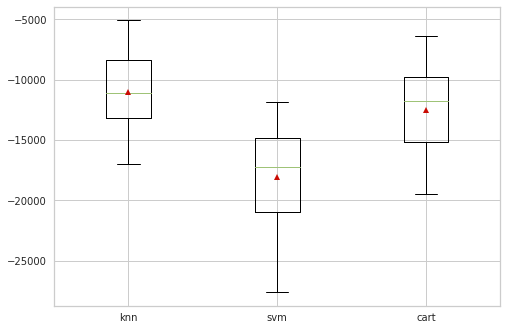

In [88]:
from numpy import mean
from numpy import std

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [89]:
from sklearn.ensemble import StackingRegressor

level0 = list(models.items())
level1 = LinearRegression()
stacking = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

models['Stacking'] = stacking

>knn -11018.202 (3051.587)
>svm -18065.503 (4252.165)
>cart -12080.408 (3594.896)
>Stacking -12477.645 (3085.367)


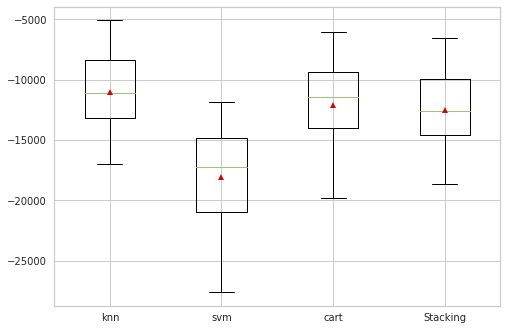

In [90]:
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [91]:
stacking.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()), ('svm', SVR()),
                              ('cart', DecisionTreeRegressor())],
                  final_estimator=LinearRegression())

In [92]:
# fit the model using 5-fold cross validation. This gives a more robust score our model.
stack_scores = cross_validate(stacking, X_train, y_train, 
                              scoring=('r2', 'neg_mean_squared_error',#'neg_mean_squared_log_error'
                                      ),
                              cv=5)
stack_r2 =   np.mean(stack_scores['test_r2'])
stack_rmse = np.mean(stack_scores['test_neg_mean_squared_error'])
#stack_mlse = np.mean(stack_scores['test_neg_mean_squared_log_error'])

print(f"Ensemble r^2: {stack_r2}")
print(f"Ensemble RMSE: {stack_rmse}")
#print(f"Ensemble MLSE: {stack_mlse}")

Ensemble r^2: 0.41253768829866944
Ensemble RMSE: -5133588793.280876


## Final Model Summary (Training Data)

|      Model             |      r^2     |      RMSE         |   MSLE   | 
|       :-:              |      :-:     |      :-:          |   :--:   |
|     Baseline           |    0.0000    |   9,524,549,313   |  6.3404  |  
|     Linear Regression  |    0.4104    |  -4,473,514,039   |   NAN    |
|     Random Forest      |    0.4932    |  -4,449,195,919   | -0.5041  |
|     XGBoost            |    0.4746    |  -4,539,382,990   |   NAN    |
|     Stacking           |    0.4444    |  -4,993,810,362   |   NAN    |

Our stacking model does not outperform the Random Forest model. Our data set is prone to outliers and sparse data. The Random Forest model is ideal for this kind of data set because the trees protect each other from their individual errors. 

Although the Stacking model does this to a degree, the Random Forest is built for it. We also allowed for many more trees than models in the ensemble. 

We will run our ensemble model against our test data to see how it generalizes compared to our Random Forest model.

In [93]:
stack_scores = cross_validate(stacking, X_test, y_test, 
                              scoring=('r2', 'neg_mean_squared_error',#'neg_mean_squared_log_error'
                                      ),
                              cv=5)
stack_r2 =   np.mean(stack_scores['test_r2'])
stack_rmse = np.mean(stack_scores['test_neg_mean_squared_error'])
#stack_mlse = np.mean(stack_scores['test_neg_mean_squared_log_error'])

print(f"Ensemble r^2: {stack_r2}")
print(f"Ensemble RMSE: {stack_rmse}")
#print(f"Ensemble MLSE: {stack_mlse}")

Ensemble r^2: -3.243409877844693
Ensemble RMSE: -16867047692.493967


**Conclusion:** The ensemble model does not generalize well, and our Random Forest model remains king.   

# Final Conclusions

We were not able to address all of our research questions in this notebook. The records which contained multiple updates for individual projects required aggregation that would either lose temporal data or budget amount consistency. We opted to analyze the final costs of capital projects instead of final completion dates.

Despite losing features to data aggregation and to prevent information leaks, we were able to construct models that outperform the city's estimates. This will be a useful tool for government officials to reassess their estimates, and for the public to double check where their taxes will be going. 

We were able to identify the most important features in this model. The top five (in order) were:
1) original_budget 
2) city_prior_actuals 
3) 10yr_plan_category: jail facilities
4) city_2021
5) project_description: 10

Although some work can be done to make this a little more readable, we can see that the original budget, the amount the city has already spent, and the amount allocated for 2021 were some of the most important features. This was not the case across all of our models, but it makes intuitive sense to us. However, we also see some of the categorical/text fields taking up top positions. Our efforts to tokenize and vectorize text fields have been vindicated, and by exploring the primary features people can get a sense for which projects impact budget accuracy.

Although the random forest was our best model implementation, we believe next steps can include further parameter tuning for all of the models to improve their scores. The addition of indicator variables and other data sources can also increase the model metrics.

We could also implement term frequency-inverse document frequency to better extract information from the text fields.

